This notebook shows and example of how to use the code in the 'ising_block_level_influence' repository.

We will show
- How to compute the mean-field optimal control on a network at the level of nodes
- How to compute the mean-field optimal control on a network at the level of blocks
- (How to perform Monte-Carlo simulations in order to evaluate the performance of the different controls). Perhaps refer to different pieces of code used in paper for performance evaulation - e.g. we already have several examples.


To do:
- Rather than using the functions within two_block_sbm_class we should work more directly with the underlying functions to make things more clear.

Created on: 21/06/20

In [4]:
import matplotlib.pyplot as plt
import random
import numpy as np
import networkx as nx
from ising_block_level_influence import two_block_sbm_class as two_block

#Seed the random number generators:
seed = 1
random.seed(seed)
np.random.seed(seed)

### 1 Gernete an SBM graph with three blocks

In [14]:
from ising_block_level_influence.N_Block_sbm_class import block_generator, project_block_to_graph_for_names

In [34]:
coupling_matrix = np.asarray(np.asarray( [ [25.0,1.0,1.0] , [1.0,20.0,1.0],[1.0,1.0,15.0]]))
block_sizes=[50,50,50]
block_gen = block_generator(coupling_matrix,block_sizes)

In [35]:
sbm_graph = block_gen.make_sbm()

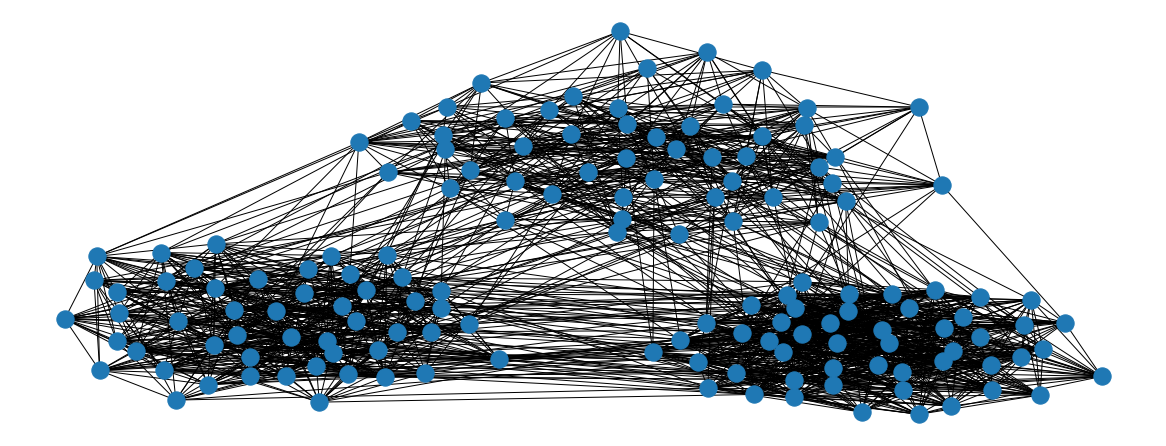

In [36]:
nx.draw(sbm_graph)

### 2 Derive the control at the level of individual nodes

In [37]:
from ising_block_level_influence import mean_field_IIM
from spatial_spin_monte_carlo import spatial_spin_monte_carlo as Spins

In [38]:
beta_c = Spins.crit_beta(sbm_graph)

In [39]:
Field_Budget_Full = 100.0 #Valid for equal block sizes.
beta_factor=1.5
beta = beta_factor*beta_c

full_graph_system = mean_field_IIM.mean_field_ising_system(sbm_graph, np.zeros(len(sbm_graph)))

#Do this to make the graph weighted:
#A = nx.to_numpy_matrix(sbm_graph)
#graph_again = nx.from_numpy_matrix(A)
#full_control, mag_vals = mean_field_IIM.mean_field_IIM(graph_again, beta, Field_Budget_Full, step_size=step_size,Max_Iterations=Max_Iterations)
full_control, mag_vals = full_graph_system.mf_IIM(beta,Field_Budget_Full,full_record=False)















  0%|          | 0/10000 [00:00<?, ?it/s]













  0%|          | 3/10000 [00:00<06:24, 26.03it/s]













  0%|          | 7/10000 [00:00<05:47, 28.80it/s]













  0%|          | 11/10000 [00:00<06:15, 26.61it/s]














  0%|          | 0/1000 [00:00<?, ?it/s]














  0%|          | 0/10000 [00:00<?, ?it/s]














  0%|          | 3/10000 [00:00<05:36, 29.74it/s]

MF completed with 12 iterations and diff =4.325214632228125e-06 m = 0.7024024877238189

















  0%|          | 7/10000 [00:00<07:55, 21.01it/s]














  0%|          | 1/1000 [00:00<05:46,  2.89it/s]














  0%|          | 0/10000 [00:00<?, ?it/s]














  0%|          | 3/10000 [00:00<08:25, 19.77it/s]

MF completed with 9 iterations and diff =9.362065521600904e-06 m = 0.7433399879802812

















  0%|          | 6/10000 [00:00<10:32, 15.80it/s]














  0%|          | 2/1000 [00:00<05:58,  2.78it/s]














  0%|          | 0/10000 [00:00<?, ?it/s]














  0%|          | 4/10000 [00:00<05:34, 29.87it/s]

MF completed with 9 iterations and diff =8.602168027782575e-06 m = 0.7444965551646319
Iteration 1 , m_difference = 0.001156567184350643

















  0%|          | 8/10000 [00:00<06:32, 25.46it/s]














  0%|          | 3/1000 [00:01<05:47,  2.87it/s]














  0%|          | 0/10000 [00:00<?, ?it/s]














  0%|          | 4/10000 [00:00<04:25, 37.71it/s]

MF completed with 9 iterations and diff =7.923457848724169e-06 m = 0.7456153629260136
Iteration 2 , m_difference = 0.0011188077613817349

















  0%|          | 8/10000 [00:00<06:08, 27.14it/s]














  0%|          | 4/1000 [00:01<05:34,  2.98it/s]














  0%|          | 0/10000 [00:00<?, ?it/s]














  0%|          | 3/10000 [00:00<07:27, 22.34it/s]
















MF completed with 9 iterations and diff =7.315949497210816e-06 m = 0.7466980814785763
Iteration 3 , m_difference = 0.0010827185525627003


  0%|          | 7/10000 [00:00<08:12, 20.29it/s]














  0%|          | 5/1000 [00:01<05:39,  2.93it/s]














  0%|          | 0/10000 [00:00<?, ?it/s]














  0%|          | 3/10000 [00:00<06:15, 26.61it/s]

MF completed with 9 iterations and diff =6.771016577311606e-06 m = 0.7477462807775254
Iteration 4 , m_difference = 0.0010481992989490596

















  0%|          | 6/10000 [00:00<08:55, 18.68it/s]














  1%|          | 6/1000 [00:02<05:36,  2.95it/s]














  0%|          | 0/10000 [00:00<?, ?it/s]














  0%|          | 3/10000 [00:00<06:06, 27.24it/s]

MF completed with 9 iterations and diff =6.281191870516345e-06 m = 0.7487614377537191
Iteration 5 , m_difference = 0.0010151569761936985

















  0%|          | 7/10000 [00:00<07:36, 21.88it/s]














  1%|          | 7/1000 [00:02<05:35,  2.96it/s]














  0%|          | 0/10000 [00:00<?, ?it/s]














  0%|          | 3/10000 [00:00<08:58, 18.55it/s]

MF completed with 9 iterations and diff =5.839998746259845e-06 m = 0.7497449429481962
Iteration 6 , m_difference = 0.0009835051944770967

















  0%|          | 5/10000 [00:00<09:36, 17.32it/s]














  0%|          | 8/10000 [00:00<09:33, 17.44it/s]














  1%|          | 8/1000 [00:02<06:15,  2.64it/s]














  0%|          | 0/10000 [00:00<?, ?it/s]














  0%|          | 3/10000 [00:00<06:57, 23.96it/s]

MF completed with 9 iterations and diff =5.441808717310259e-06 m = 0.7506981066051818
Iteration 7 , m_difference = 0.0009531636569856117

















  0%|          | 7/10000 [00:00<08:02, 20.71it/s]














  1%|          | 9/1000 [00:03<06:07,  2.70it/s]














  0%|          | 0/10000 [00:00<?, ?it/s]














  0%|          | 4/10000 [00:00<04:43, 35.21it/s]

MF completed with 9 iterations and diff =5.081720869215545e-06 m = 0.7516221642754279
Iteration 8 , m_difference = 0.00092405767024617

















  0%|          | 8/10000 [00:00<06:00, 27.71it/s]














  1%|          | 10/1000 [00:03<05:46,  2.86it/s]














  0%|          | 0/10000 [00:00<?, ?it/s]














  0%|          | 3/10000 [00:00<05:40, 29.39it/s]

MF completed with 9 iterations and diff =4.755459615202184e-06 m = 0.7525182819759023
Iteration 9 , m_difference = 0.0008961177004743748

















  0%|          | 7/10000 [00:00<07:28, 22.26it/s]














  1%|          | 11/1000 [00:03<05:38,  2.92it/s]














  0%|          | 0/10000 [00:00<?, ?it/s]














  0%|          | 4/10000 [00:00<04:43, 35.23it/s]
















MF completed with 9 iterations and diff =4.459287831548586e-06 m = 0.7533875609467322
Iteration 10 , m_difference = 0.0008692789708298898


  0%|          | 8/10000 [00:00<06:45, 24.65it/s]














  1%|          | 12/1000 [00:04<05:38,  2.92it/s]














  0%|          | 0/10000 [00:00<?, ?it/s]














  0%|          | 3/10000 [00:00<05:50, 28.53it/s]

MF completed with 9 iterations and diff =4.1899329248362704e-06 m = 0.7542310420418418
Iteration 11 , m_difference = 0.0008434810951095661

















  0%|          | 7/10000 [00:00<07:26, 22.39it/s]














  1%|▏         | 13/1000 [00:04<05:35,  2.94it/s]














  0%|          | 0/10000 [00:00<?, ?it/s]














  0%|          | 3/10000 [00:00<05:39, 29.41it/s]

MF completed with 9 iterations and diff =3.946414066646753e-06 m = 0.755041222866805
Iteration 12 , m_difference = 0.0008101808249632025

















  0%|          | 6/10000 [00:00<09:30, 17.51it/s]














  1%|▏         | 14/1000 [00:04<05:41,  2.89it/s]














  0%|          | 0/10000 [00:00<?, ?it/s]














  0%|          | 4/10000 [00:00<04:48, 34.63it/s]
















MF completed with 9 iterations and diff =3.732708651837946e-06 m = 0.7557884118733473
Iteration 13 , m_difference = 0.0007471890065423592


  0%|          | 7/10000 [00:00<07:29, 22.25it/s]














  2%|▏         | 15/1000 [00:05<05:34,  2.94it/s]














  0%|          | 0/10000 [00:00<?, ?it/s]














  0%|          | 3/10000 [00:00<06:03, 27.51it/s]

MF completed with 9 iterations and diff =3.5568291463228263e-06 m = 0.756424676296452
Iteration 14 , m_difference = 0.0006362644231047154

















  0%|          | 7/10000 [00:00<07:36, 21.88it/s]














  2%|▏         | 16/1000 [00:05<05:33,  2.95it/s]














  0%|          | 0/10000 [00:00<?, ?it/s]














  0%|          | 4/10000 [00:00<04:57, 33.62it/s]
















MF completed with 9 iterations and diff =3.42037645151283e-06 m = 0.7569311698397638
Iteration 15 , m_difference = 0.0005064935433117812


  0%|          | 8/10000 [00:00<06:04, 27.39it/s]














  2%|▏         | 17/1000 [00:05<05:23,  3.04it/s]














  0%|          | 0/10000 [00:00<?, ?it/s]














  0%|          | 3/10000 [00:00<06:44, 24.69it/s]

MF completed with 9 iterations and diff =3.310349497076537e-06 m = 0.7573539907472234
Iteration 16 , m_difference = 0.0004228209074595979

















  0%|          | 7/10000 [00:00<07:39, 21.75it/s]














  2%|▏         | 18/1000 [00:06<05:24,  3.03it/s]














  0%|          | 0/10000 [00:00<?, ?it/s]














  0%|          | 4/10000 [00:00<04:29, 37.16it/s]
















MF completed with 9 iterations and diff =3.214633305992365e-06 m = 0.7577379294605802
Iteration 17 , m_difference = 0.00038393871335673513


  0%|          | 8/10000 [00:00<06:37, 25.14it/s]














  2%|▏         | 19/1000 [00:06<05:24,  3.02it/s]














  0%|          | 0/10000 [00:00<?, ?it/s]














  0%|          | 3/10000 [00:00<05:48, 28.66it/s]

MF completed with 9 iterations and diff =3.1374512182713588e-06 m = 0.7580643479555329
Iteration 18 , m_difference = 0.00032641849495274045

















  0%|          | 7/10000 [00:00<07:05, 23.48it/s]














  2%|▏         | 20/1000 [00:06<05:18,  3.08it/s]














  0%|          | 0/10000 [00:00<?, ?it/s]














  0%|          | 4/10000 [00:00<04:42, 35.40it/s]

MF completed with 9 iterations and diff =3.077723140676447e-06 m = 0.7583360604206797
Iteration 19 , m_difference = 0.0002717124651467895

















  0%|          | 8/10000 [00:00<06:15, 26.60it/s]














  2%|▏         | 21/1000 [00:07<05:13,  3.12it/s]














  0%|          | 0/10000 [00:00<?, ?it/s]














  0%|          | 4/10000 [00:00<04:26, 37.44it/s]

MF completed with 9 iterations and diff =3.0340770992287602e-06 m = 0.7585542957303292
Iteration 20 , m_difference = 0.0002182353096494838

















  0%|          | 8/10000 [00:00<05:25, 30.72it/s]














  2%|▏         | 22/1000 [00:07<04:59,  3.26it/s]














  0%|          | 0/10000 [00:00<?, ?it/s]














  0%|          | 4/10000 [00:00<04:55, 33.78it/s]

MF completed with 8 iterations and diff =9.989160672740915e-06 m = 0.758745171186193
Iteration 21 , m_difference = 0.00019087545586382593

















  0%|          | 7/10000 [00:00<06:40, 24.92it/s]














  2%|▏         | 23/1000 [00:07<04:57,  3.28it/s]














  0%|          | 0/10000 [00:00<?, ?it/s]














  0%|          | 3/10000 [00:00<06:04, 27.40it/s]

MF completed with 8 iterations and diff =9.913333463784646e-06 m = 0.7589110533285087
Iteration 22 , m_difference = 0.00016588214231572085

















  0%|          | 7/10000 [00:00<07:15, 22.96it/s]














  2%|▏         | 24/1000 [00:08<05:01,  3.24it/s]














  0%|          | 0/10000 [00:00<?, ?it/s]














  0%|          | 3/10000 [00:00<05:35, 29.83it/s]

MF completed with 8 iterations and diff =9.848887208785406e-06 m = 0.7590636336439134
Iteration 23 , m_difference = 0.0001525803154046601

















  0%|          | 7/10000 [00:00<05:15, 31.67it/s]













  2%|▎         | 25/1000 [00:08<04:51,  3.35it/s]















  0%|          | 0/10000 [00:00<?, ?it/s]















  0%|          | 3/10000 [00:00<06:42, 24.83it/s]

MF completed with 8 iterations and diff =9.797876192041421e-06 m = 0.7591976308575413
Iteration 24 , m_difference = 0.00013399721362794548


















  0%|          | 7/10000 [00:00<07:50, 21.23it/s]














  3%|▎         | 26/1000 [00:08<05:02,  3.22it/s]















  0%|          | 0/10000 [00:00<?, ?it/s]















  0%|          | 4/10000 [00:00<04:57, 33.62it/s]

MF completed with 8 iterations and diff =9.754970663244933e-06 m = 0.7593237833858553
Iteration 25 , m_difference = 0.00012615252831393864


















  0%|          | 8/10000 [00:00<05:46, 28.86it/s]














  3%|▎         | 27/1000 [00:08<04:55,  3.29it/s]















  0%|          | 0/10000 [00:00<?, ?it/s]















  0%|          | 4/10000 [00:00<04:44, 35.12it/s]

MF completed with 8 iterations and diff =9.717757241123337e-06 m = 0.7594424788620887
Iteration 26 , m_difference = 0.00011869547623344356


















  0%|          | 7/10000 [00:00<07:00, 23.77it/s]














  3%|▎         | 28/1000 [00:09<04:57,  3.27it/s]















  0%|          | 0/10000 [00:00<?, ?it/s]















  0%|          | 3/10000 [00:00<05:39, 29.45it/s]

MF completed with 8 iterations and diff =9.685886937615962e-06 m = 0.7595534972985856
Iteration 27 , m_difference = 0.00011101843649685694


















  0%|          | 7/10000 [00:00<07:04, 23.53it/s]














  3%|▎         | 29/1000 [00:09<04:57,  3.26it/s]















  0%|          | 0/10000 [00:00<?, ?it/s]















  0%|          | 4/10000 [00:00<04:35, 36.31it/s]

MF completed with 8 iterations and diff =9.659318264465533e-06 m = 0.7596583822675135
Iteration 28 , m_difference = 0.00010488496892790966


















  0%|          | 8/10000 [00:00<05:55, 28.10it/s]














  3%|▎         | 30/1000 [00:09<04:56,  3.28it/s]















  0%|          | 0/10000 [00:00<?, ?it/s]















  0%|          | 3/10000 [00:00<07:15, 22.95it/s]

















MF completed with 8 iterations and diff =9.638116704846489e-06 m = 0.7597565706466355
Iteration 29 , m_difference = 9.818837912201062e-05


  0%|          | 6/10000 [00:00<09:22, 17.77it/s]














  3%|▎         | 31/1000 [00:10<05:09,  3.13it/s]















  0%|          | 0/10000 [00:00<?, ?it/s]















  0%|          | 4/10000 [00:00<04:47, 34.74it/s]

MF completed with 8 iterations and diff =9.62216367006441e-06 m = 0.7598450842186979
Iteration 30 , m_difference = 8.851357206240973e-05


















  0%|          | 8/10000 [00:00<05:58, 27.86it/s]














  3%|▎         | 32/1000 [00:10<05:03,  3.19it/s]















  0%|          | 0/10000 [00:00<?, ?it/s]















  0%|          | 3/10000 [00:00<06:16, 26.57it/s]

MF completed with 8 iterations and diff =9.610446326413502e-06 m = 0.7599243287982973
Iteration 31 , m_difference = 7.924457959940234e-05


















  0%|          | 7/10000 [00:00<07:23, 22.56it/s]














  3%|▎         | 33/1000 [00:10<05:05,  3.16it/s]















  0%|          | 0/10000 [00:00<?, ?it/s]















  0%|          | 3/10000 [00:00<05:44, 29.03it/s]

MF completed with 8 iterations and diff =9.601665518332858e-06 m = 0.759997955117435
Iteration 32 , m_difference = 7.362631913765405e-05


















  0%|          | 6/10000 [00:00<08:42, 19.14it/s]














  3%|▎         | 34/1000 [00:11<05:07,  3.14it/s]















  0%|          | 0/10000 [00:00<?, ?it/s]















  0%|          | 4/10000 [00:00<04:41, 35.46it/s]

















MF completed with 8 iterations and diff =9.595951816154802e-06 m = 0.7600667096761575
Iteration 33 , m_difference = 6.875455872257241e-05


  0%|          | 7/10000 [00:00<06:49, 24.40it/s]














  4%|▎         | 35/1000 [00:11<05:01,  3.20it/s]















  0%|          | 0/10000 [00:00<?, ?it/s]















  0%|          | 3/10000 [00:00<07:46, 21.42it/s]

MF completed with 8 iterations and diff =9.592818705494999e-06 m = 0.7601317238128649
Iteration 34 , m_difference = 6.501413670734202e-05


















  0%|          | 5/10000 [00:00<11:50, 14.06it/s]














  4%|▎         | 36/1000 [00:11<05:16,  3.04it/s]















  0%|          | 0/10000 [00:00<?, ?it/s]















  0%|          | 3/10000 [00:00<05:57, 27.97it/s]

MF completed with 8 iterations and diff =9.591882210502334e-06 m = 0.7601940352685943
Iteration 35 , m_difference = 6.231145572943575e-05


















  0%|          | 7/10000 [00:00<06:58, 23.90it/s]














  4%|▎         | 37/1000 [00:12<05:09,  3.11it/s]















  0%|          | 0/10000 [00:00<?, ?it/s]















  0%|          | 3/10000 [00:00<06:58, 23.91it/s]

















MF completed with 8 iterations and diff =9.594503430854218e-06 m = 0.7602469520149394
Iteration 36 , m_difference = 5.291674634511079e-05


  0%|          | 7/10000 [00:00<08:12, 20.29it/s]














  4%|▍         | 38/1000 [00:12<05:20,  3.00it/s]















  0%|          | 0/10000 [00:00<?, ?it/s]















  0%|          | 4/10000 [00:00<04:52, 34.22it/s]

















MF completed with 8 iterations and diff =9.599468397958333e-06 m = 0.7602933161631745
Iteration 37 , m_difference = 4.636414823511181e-05


  0%|          | 8/10000 [00:00<05:43, 29.10it/s]














  4%|▍         | 39/1000 [00:12<05:08,  3.12it/s]















  0%|          | 0/10000 [00:00<?, ?it/s]















  0%|          | 4/10000 [00:00<04:33, 36.52it/s]

MF completed with 8 iterations and diff =9.606206475831769e-06 m = 0.7603362783605288
Iteration 38 , m_difference = 4.29621973542238e-05


















  0%|          | 8/10000 [00:00<05:54, 28.20it/s]














  4%|▍         | 40/1000 [00:13<05:00,  3.20it/s]















  0%|          | 0/10000 [00:00<?, ?it/s]















  0%|          | 3/10000 [00:00<07:19, 22.72it/s]

MF completed with 8 iterations and diff =9.61435788482401e-06 m = 0.76037672909277
Iteration 39 , m_difference = 4.04507322412373e-05


















  0%|          | 7/10000 [00:00<07:30, 22.19it/s]














  4%|▍         | 41/1000 [00:13<05:07,  3.12it/s]















  0%|          | 0/10000 [00:00<?, ?it/s]















  0%|          | 3/10000 [00:00<06:17, 26.46it/s]

MF completed with 8 iterations and diff =9.624155918208643e-06 m = 0.7604135096105776
Iteration 40 , m_difference = 3.678051780764413e-05


















  0%|          | 7/10000 [00:00<07:13, 23.07it/s]














  4%|▍         | 42/1000 [00:13<05:05,  3.14it/s]















  0%|          | 0/10000 [00:00<?, ?it/s]















  0%|          | 3/10000 [00:00<06:32, 25.44it/s]

















MF completed with 8 iterations and diff =9.635181111966595e-06 m = 0.7604472022999605
Iteration 41 , m_difference = 3.36926893829137e-05


  0%|          | 6/10000 [00:00<08:56, 18.64it/s]














  4%|▍         | 43/1000 [00:14<05:09,  3.10it/s]















  0%|          | 0/10000 [00:00<?, ?it/s]















  0%|          | 3/10000 [00:00<07:40, 21.70it/s]

















MF completed with 8 iterations and diff =9.647078065833092e-06 m = 0.7604779723287243
Iteration 42 , m_difference = 3.077002876372692e-05


  0%|          | 7/10000 [00:00<07:42, 21.62it/s]














  4%|▍         | 44/1000 [00:14<05:14,  3.04it/s]















  0%|          | 0/10000 [00:00<?, ?it/s]















  0%|          | 3/10000 [00:00<07:18, 22.82it/s]

MF completed with 8 iterations and diff =9.659722646326863e-06 m = 0.7605074193826847
Iteration 43 , m_difference = 2.9447053960462988e-05


















  0%|          | 6/10000 [00:00<08:43, 19.10it/s]














  4%|▍         | 45/1000 [00:14<05:12,  3.06it/s]















  0%|          | 0/10000 [00:00<?, ?it/s]















  0%|          | 3/10000 [00:00<07:49, 21.31it/s]

MF completed with 8 iterations and diff =9.673037735580259e-06 m = 0.7605347266427629
Iteration 44 , m_difference = 2.7307260078157647e-05


















  0%|          | 6/10000 [00:00<09:15, 17.99it/s]














  5%|▍         | 46/1000 [00:15<05:16,  3.02it/s]















  0%|          | 0/10000 [00:00<?, ?it/s]















  0%|          | 3/10000 [00:00<06:18, 26.43it/s]

MF completed with 8 iterations and diff =9.68695078185089e-06 m = 0.7605600697558492
Iteration 45 , m_difference = 2.5343113086329083e-05


















  0%|          | 5/10000 [00:00<07:04, 23.52it/s]















  0%|          | 7/10000 [00:00<11:43, 14.21it/s]














  5%|▍         | 47/1000 [00:15<06:06,  2.60it/s]















  0%|          | 0/10000 [00:00<?, ?it/s]















  0%|          | 2/10000 [00:00<09:28, 17.59it/s]

MF completed with 8 iterations and diff =9.701448432042348e-06 m = 0.7605837820276745
Iteration 46 , m_difference = 2.3712271825293563e-05


















  0%|          | 4/10000 [00:00<09:36, 17.34it/s]















  0%|          | 6/10000 [00:00<10:58, 15.18it/s]















  0%|          | 8/10000 [00:00<12:20, 13.49it/s]














  5%|▍         | 48/1000 [00:16<07:11,  2.21it/s]















  0%|          | 0/10000 [00:00<?, ?it/s]















  0%|          | 4/10000 [00:00<04:56, 33.76it/s]

MF completed with 8 iterations and diff =9.716380167779093e-06 m = 0.7606050781868183
Iteration 47 , m_difference = 2.129615914381322e-05


















  0%|          | 6/10000 [00:00<10:15, 16.24it/s]














  5%|▍         | 49/1000 [00:16<06:52,  2.31it/s]















  0%|          | 0/10000 [00:00<?, ?it/s]















  0%|          | 3/10000 [00:00<05:42, 29.17it/s]

MF completed with 8 iterations and diff =9.731500833054518e-06 m = 0.7606239287242583
Iteration 48 , m_difference = 1.8850537439996096e-05


















  0%|          | 7/10000 [00:00<07:33, 22.02it/s]














  5%|▌         | 50/1000 [00:16<06:22,  2.48it/s]















  0%|          | 0/10000 [00:00<?, ?it/s]















  0%|          | 3/10000 [00:00<06:24, 25.98it/s]

MF completed with 8 iterations and diff =9.746910961450084e-06 m = 0.7606414360740437
Iteration 49 , m_difference = 1.750734978533952e-05


















  0%|          | 6/10000 [00:00<08:39, 19.25it/s]














  5%|▌         | 51/1000 [00:17<06:04,  2.60it/s]















  0%|          | 0/10000 [00:00<?, ?it/s]















  0%|          | 3/10000 [00:00<07:08, 23.31it/s]

MF completed with 8 iterations and diff =9.76290715737349e-06 m = 0.7606570477335913
Iteration 50 , m_difference = 1.561165954766519e-05


















  0%|          | 6/10000 [00:00<09:38, 17.28it/s]














  5%|▌         | 52/1000 [00:17<05:57,  2.65it/s]















  0%|          | 0/10000 [00:00<?, ?it/s]















  0%|          | 2/10000 [00:00<08:27, 19.71it/s]

MF completed with 8 iterations and diff =9.779232437168162e-06 m = 0.7606717415959329
Iteration 51 , m_difference = 1.4693862341541575e-05


















  0%|          | 5/10000 [00:00<07:50, 21.26it/s]















  0%|          | 8/10000 [00:00<07:32, 22.08it/s]














  5%|▌         | 53/1000 [00:17<05:57,  2.65it/s]















  0%|          | 0/10000 [00:00<?, ?it/s]















  0%|          | 3/10000 [00:00<06:03, 27.47it/s]

MF completed with 8 iterations and diff =9.795749853824809e-06 m = 0.7606849121531026
Iteration 52 , m_difference = 1.3170557169761565e-05


















  0%|          | 6/10000 [00:00<06:10, 26.96it/s]













  5%|▌         | 54/1000 [00:18<05:43,  2.75it/s]
















  0%|          | 0/10000 [00:00<?, ?it/s]
















  0%|          | 3/10000 [00:00<06:29, 25.67it/s]

MF completed with 8 iterations and diff =9.812410841969488e-06 m = 0.7606961703044258
Iteration 53 , m_difference = 1.1258151323190191e-05



















  0%|          | 6/10000 [00:00<06:22, 26.12it/s]
















  0%|          | 8/10000 [00:00<08:15, 20.15it/s]














  6%|▌         | 55/1000 [00:18<05:55,  2.66it/s]
















  0%|          | 0/10000 [00:00<?, ?it/s]
















  0%|          | 2/10000 [00:00<08:50, 18.84it/s]

MF completed with 8 iterations and diff =9.829258878490954e-06 m = 0.7607068168289969
Iteration 54 , m_difference = 1.0646524571056304e-05



















  0%|          | 5/10000 [00:00<10:56, 15.22it/s]














  6%|▌         | 56/1000 [00:19<05:44,  2.74it/s]
















  0%|          | 0/10000 [00:00<?, ?it/s]
















  0%|          | 4/10000 [00:00<05:19, 31.28it/s]

MF completed with 8 iterations and diff =9.846280560998899e-06 m = 0.760716871750207
Iteration 55 , m_difference = 1.0054921210089773e-05



















  0%|          | 8/10000 [00:00<06:17, 26.46it/s]














  6%|▌         | 57/1000 [00:19<05:29,  2.86it/s]
















  0%|          | 0/10000 [00:00<?, ?it/s]
















  0%|          | 3/10000 [00:00<06:10, 27.00it/s]


















MF completed with 8 iterations and diff =9.8634641905182e-06 m = 0.760726229006346
Iteration 56 , m_difference = 9.357256139042036e-06


  0%|          | 6/10000 [00:00<08:58, 18.57it/s]














  6%|▌         | 58/1000 [00:19<05:26,  2.89it/s]
















  0%|          | 0/10000 [00:00<?, ?it/s]
















  0%|          | 3/10000 [00:00<05:44, 29.05it/s]

MF completed with 8 iterations and diff =9.880655828964358e-06 m = 0.760733874797865
Iteration 57 , m_difference = 7.645791519017564e-06



















  0%|          | 7/10000 [00:00<06:44, 24.69it/s]














  6%|▌         | 59/1000 [00:20<05:16,  2.97it/s]
















  0%|          | 0/10000 [00:00<?, ?it/s]
















  0%|          | 4/10000 [00:00<05:04, 32.81it/s]


















MF completed with 8 iterations and diff =9.897850033357969e-06 m = 0.760740712900553
Iteration 58 , m_difference = 6.8381026879782425e-06


  0%|          | 8/10000 [00:00<05:40, 29.34it/s]














  6%|▌         | 60/1000 [00:20<05:02,  3.11it/s]
















  0%|          | 0/10000 [00:00<?, ?it/s]
















  0%|          | 4/10000 [00:00<05:00, 33.30it/s]

MF completed with 8 iterations and diff =9.915133627358408e-06 m = 0.7607470890732816
Iteration 59 , m_difference = 6.376172728583818e-06



















  0%|          | 7/10000 [00:00<06:42, 24.81it/s]














  6%|▌         | 61/1000 [00:20<04:53,  3.20it/s]
















  0%|          | 0/10000 [00:00<?, ?it/s]
















  0%|          | 3/10000 [00:00<06:25, 25.96it/s]

MF completed with 8 iterations and diff =9.932498126530298e-06 m = 0.7607530180573274
Iteration 60 , m_difference = 5.928984045833197e-06



















  0%|          | 7/10000 [00:00<06:56, 24.00it/s]














  6%|▌         | 62/1000 [00:20<04:52,  3.20it/s]
















  0%|          | 0/10000 [00:00<?, ?it/s]
















  0%|          | 3/10000 [00:00<05:53, 28.30it/s]


















MF completed with 8 iterations and diff =9.94993539538136e-06 m = 0.7607585141373494
Iteration 61 , m_difference = 5.496080021982763e-06


  0%|          | 6/10000 [00:00<08:21, 19.94it/s]














  6%|▋         | 63/1000 [00:21<04:55,  3.17it/s]
















  0%|          | 0/10000 [00:00<?, ?it/s]
















  0%|          | 4/10000 [00:00<04:46, 34.94it/s]


















MF completed with 8 iterations and diff =9.967437635705068e-06 m = 0.7607635911558356
Iteration 62 , m_difference = 5.077018486177032e-06


  0%|          | 7/10000 [00:00<07:07, 23.36it/s]














  6%|▋         | 64/1000 [00:21<04:55,  3.17it/s]
















  0%|          | 0/10000 [00:00<?, ?it/s]
















  0%|          | 4/10000 [00:00<04:35, 36.27it/s]

MF completed with 8 iterations and diff =9.984997372147753e-06 m = 0.7607682625271085
Iteration 63 , m_difference = 4.67137127291295e-06



















  0%|          | 7/10000 [00:00<07:15, 22.96it/s]














  6%|▋         | 65/1000 [00:21<04:55,  3.17it/s]
















  0%|          | 0/10000 [00:00<?, ?it/s]
















  0%|          | 4/10000 [00:00<04:38, 35.87it/s]

MF completed with 9 iterations and diff =3.005461977734214e-06 m = 0.7607695357889211
Iteration 64 , m_difference = 1.273261812650972e-06



















  0%|          | 8/10000 [00:00<05:55, 28.13it/s]














  7%|▋         | 66/1000 [00:22<04:50,  3.22it/s]
















  0%|          | 0/10000 [00:00<?, ?it/s]
















  0%|          | 4/10000 [00:00<04:59, 33.35it/s]

MF completed with 9 iterations and diff =3.011627715210352e-06 m = 0.7607734274301928
Iteration 65 , m_difference = 3.891641271680513e-06



















  0%|          | 8/10000 [00:00<06:19, 26.36it/s]














  7%|▋         | 67/1000 [00:22<04:51,  3.20it/s]
















  0%|          | 0/10000 [00:00<?, ?it/s]
















  0%|          | 3/10000 [00:00<05:53, 28.24it/s]

MF completed with 9 iterations and diff =3.017733484655949e-06 m = 0.7607769678140367
Iteration 66 , m_difference = 3.5403838438696766e-06



















  0%|          | 7/10000 [00:00<07:25, 22.41it/s]














  7%|▋         | 68/1000 [00:22<04:55,  3.15it/s]
















  0%|          | 0/10000 [00:00<?, ?it/s]
















  0%|          | 4/10000 [00:00<04:25, 37.61it/s]


















MF completed with 9 iterations and diff =3.023238043242671e-06 m = 0.7607802953578999
Iteration 67 , m_difference = 3.327543863229643e-06


  0%|          | 7/10000 [00:00<07:10, 23.20it/s]














  7%|▋         | 69/1000 [00:23<04:56,  3.14it/s]
















  0%|          | 0/10000 [00:00<?, ?it/s]
















  0%|          | 4/10000 [00:00<04:28, 37.21it/s]

MF completed with 9 iterations and diff =3.0287549503960065e-06 m = 0.7607832844908909
Iteration 68 , m_difference = 2.989132991015886e-06



















  0%|          | 8/10000 [00:00<05:49, 28.60it/s]














  7%|▋         | 70/1000 [00:23<04:48,  3.22it/s]
















  0%|          | 0/10000 [00:00<?, ?it/s]
















  0%|          | 4/10000 [00:00<04:51, 34.28it/s]

MF completed with 9 iterations and diff =3.034155533931937e-06 m = 0.7607858834364563
Iteration 69 , m_difference = 2.5989455653130378e-06



















  0%|          | 8/10000 [00:00<06:11, 26.92it/s]














  7%|▋         | 71/1000 [00:23<04:48,  3.22it/s]
















  0%|          | 0/10000 [00:00<?, ?it/s]
















  0%|          | 3/10000 [00:00<06:36, 25.19it/s]

MF completed with 9 iterations and diff =3.0392636980458576e-06 m = 0.7607885086495959
Iteration 70 , m_difference = 2.625213139650917e-06



















  0%|          | 6/10000 [00:00<09:34, 17.40it/s]














  7%|▋         | 72/1000 [00:24<05:01,  3.08it/s]
















  0%|          | 0/10000 [00:00<?, ?it/s]
















  0%|          | 4/10000 [00:00<04:31, 36.88it/s]

MF completed with 9 iterations and diff =3.0443767508048225e-06 m = 0.7607908481604492
Iteration 71 , m_difference = 2.3395108532664466e-06



















  0%|          | 8/10000 [00:00<06:40, 24.98it/s]














  7%|▋         | 73/1000 [00:24<05:06,  3.02it/s]
















  0%|          | 0/10000 [00:00<?, ?it/s]
















  0%|          | 3/10000 [00:00<06:42, 24.86it/s]

MF completed with 9 iterations and diff =3.0494929320612485e-06 m = 0.7607929114580301
Iteration 72 , m_difference = 2.063297580900958e-06



















  0%|          | 6/10000 [00:00<10:07, 16.44it/s]














  7%|▋         | 74/1000 [00:24<05:18,  2.91it/s]
















  0%|          | 0/10000 [00:00<?, ?it/s]
















  0%|          | 3/10000 [00:00<05:51, 28.46it/s]

MF completed with 9 iterations and diff =3.05459564120536e-06 m = 0.7607943983577057
Iteration 73 , m_difference = 1.4868996756067787e-06



















  0%|          | 7/10000 [00:00<07:09, 23.27it/s]














  8%|▊         | 75/1000 [00:25<05:09,  2.99it/s]
















  0%|          | 0/10000 [00:00<?, ?it/s]
















  0%|          | 4/10000 [00:00<04:27, 37.39it/s]


















MF completed with 9 iterations and diff =3.059690879436694e-06 m = 0.7607955384363282
Iteration 74 , m_difference = 1.1400786225079784e-06


  0%|          | 8/10000 [00:00<06:59, 23.84it/s]

MF completed with 9 iterations and diff =3.064730852986308e-06 m = 0.7607961919584915


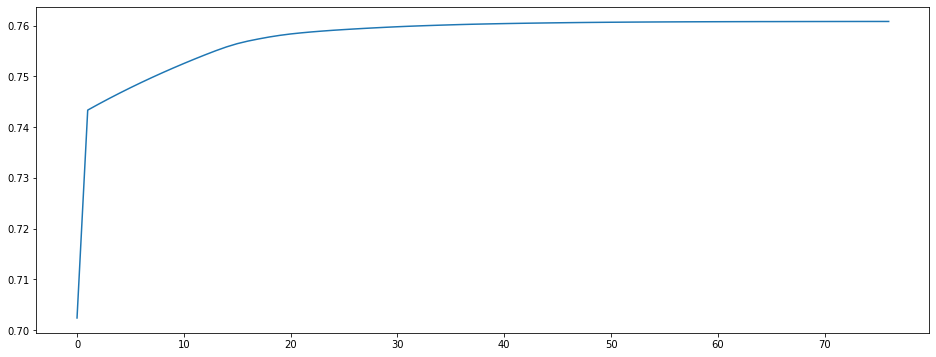

In [40]:
plt.plot(mag_vals)

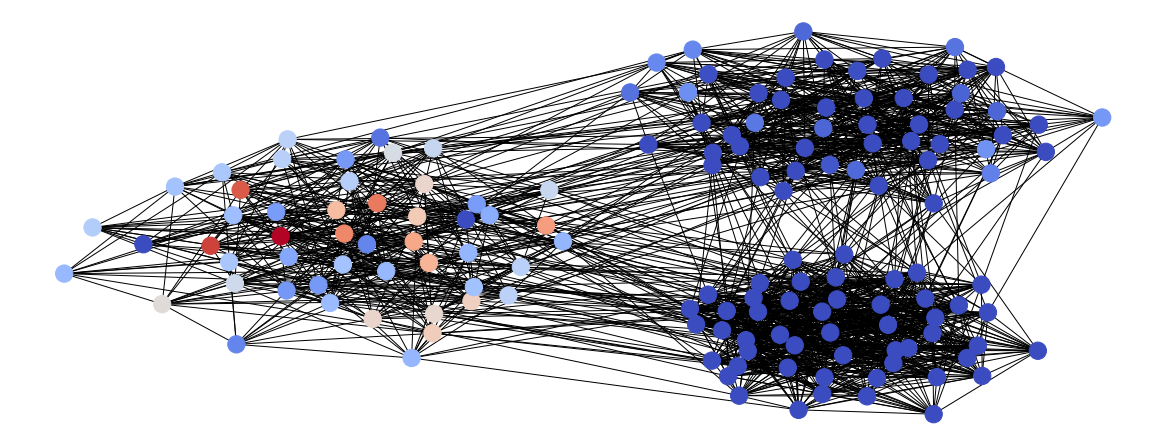
















  0%|          | 7/10000 [00:20<05:15, 31.67it/s]















  0%|          | 6/10000 [00:20<06:10, 26.96it/s]

In [41]:
nx.draw(sbm_graph,node_color=full_control,cmap='coolwarm')

For the two block sbm we can use code from the two_block_sbm_analysis class

In [2]:
two_block_class = two_block.two_block_sbm_analysis(nodes_per_block=250)
sbm_graph = two_block_class.make_sbm()
two_block_class.get_critical_temp(sbm_graph)

beta c = 0.0826339969720361


### 3 Derive control at the level of blocks

In [3]:
Field_Budget = 10.0
beta_factor = 1.5
Max_Iterations = 1000
step_size=50.0
block_control , mag_vals_block = two_block_class.block_level_control(beta_factor,Field_Budget,step_size=step_size)
full_control , mag_vals_full = two_block_class.full_graph_control(sbm_graph,beta_factor ,Field_Budget,Max_Iterations=Max_Iterations,step_size=step_size)

print("block control = {}".format(block_control))
print("\n\nFull control = {}".format(full_control))

print("Block control completed in {} iterations".format(len(mag_vals_block)-1))
print("Full control completed in {} iterations".format(len(mag_vals_full)-1))

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]



MF completed with 14 iterations and diff =8.783097007247775e-06 m = 0.568545963789438
MF completed with 5 iterations and diff =1.337315423288743e-06 m = 0.8976452554428451
MF completed with 5 iterations and diff =1.034361858054389e-06 m = 0.9041024956808954
Iteration 1 , m_difference = 0.006457240238050277
MF completed with 4 iterations and diff =8.850304923369023e-06 m = 0.90932905337588
Iteration 2 , m_difference = 0.0052265576949845904
MF completed with 4 iterations and diff =8.513621127304027e-06 m = 0.913476466389877
Iteration 3 , m_difference = 0.0041474130139970145
MF completed with 4 iterations and diff =8.841524842040371e-06 m = 0.916697920599155
Iteration 4 , m_difference = 0.0032214542092779963
MF completed with 4 iterations and diff =9.686219695881348e-06 m = 0.9191437265650902
Iteration 5 , m_difference = 0.002445805965935244
MF completed with 5 iterations and diff =1.3377568269801188e-06 m = 0.9209573310655484
Iteration 6 , m_difference = 0.001813604500458199
MF completed

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

MF completed with 5 iterations and diff =3.5072971151794974e-06 m = 0.9249877263786153
Iteration 13 , m_difference = 0.00014193789971739257
MF completed with 5 iterations and diff =3.7657199509766315e-06 m = 0.9250829455134812
Iteration 14 , m_difference = 9.521913486598699e-05
MF completed with 5 iterations and diff =3.99387284577557e-06 m = 0.9251466019587538
Iteration 15 , m_difference = 6.365644527250858e-05
MF completed with 5 iterations and diff =4.192216716103481e-06 m = 0.9251890478909642
Iteration 16 , m_difference = 4.2445932210477544e-05
MF completed with 5 iterations and diff =4.362492230791659e-06 m = 0.925217296124397
Iteration 17 , m_difference = 2.824823343272609e-05
MF completed with 5 iterations and diff =4.50718412892126e-06 m = 0.9252360686159896
Iteration 18 , m_difference = 1.8772491592655705e-05
MF completed with 5 iterations and diff =4.629118378285391e-06 m = 0.9252485306598132
Iteration 19 , m_difference = 1.2462043823546765e-05
MF completed with 5 iterations 



  0%|          | 2/10000 [00:00<10:21, 16.10it/s]

Iteration 24 , m_difference = 1.5940831978866754e-06
MF completed with 5 iterations and diff =5.0319042920188295e-06 m = 0.9252709654919852
Iteration 25 , m_difference = 1.0560688988858757e-06
MF completed with 5 iterations and diff =5.064139724786365e-06 m = 0.9252716652239691


  0%|          | 2/10000 [00:00<10:18, 16.15it/s]

MF completed with 8 iterations and diff =5.859099167171422e-06 m = 0.5705742920952829


  0%|          | 2/10000 [00:00<12:05, 13.79it/s]

MF completed with 3 iterations and diff =8.8713497479187e-06 m = 0.8819814423918596



  0%|          | 2/10000 [00:00<11:21, 14.66it/s]

MF completed with 3 iterations and diff =8.815812271523171e-06 m = 0.8825911052335734
Iteration 1 , m_difference = 0.0006096628417138206


  0%|          | 2/10000 [00:00<23:05,  7.21it/s]

MF completed with 3 iterations and diff =8.76229014468155e-06 m = 0.8831929162432414
Iteration 2 , m_difference = 0.0006018110096679408
MF completed with 3 iterations and diff =8.710735222239308e-06 m = 0.8837869608556173



  0%|          | 2/10000 [00:00<13:04, 12.75it/s]

Iteration 3 , m_difference = 0.000594044612375888


  0%|          | 2/10000 [00:00<10:02, 16.59it/s]

MF completed with 3 iterations and diff =8.661101223883527e-06 m = 0.8843733243624644
Iteration 4 , m_difference = 0.000586363506847154



  0%|          | 2/10000 [00:00<20:47,  8.01it/s]

MF completed with 3 iterations and diff =8.61334365509503e-06 m = 0.8849520918666837
Iteration 5 , m_difference = 0.0005787675042192575
MF completed with 3 iterations and diff =8.567419728877645e-06 m = 0.8855233482386113



  0%|          | 2/10000 [00:00<10:58, 15.17it/s]

Iteration 6 , m_difference = 0.0005712563719276753



  0%|          | 1/10000 [00:00<20:59,  7.94it/s]

MF completed with 3 iterations and diff =8.523288292150433e-06 m = 0.886087178074473
Iteration 7 , m_difference = 0.0005638298358616733



  0%|          | 2/10000 [00:00<11:40, 14.28it/s]

MF completed with 3 iterations and diff =8.48090975424931e-06 m = 0.8866436656569662
Iteration 8 , m_difference = 0.0005564875824931592



  0%|          | 2/10000 [00:00<10:09, 16.40it/s]

MF completed with 3 iterations and diff =8.440246022423104e-06 m = 0.8871928949179403
Iteration 9 , m_difference = 0.0005492292609741156


  0%|          | 2/10000 [00:00<11:32, 14.45it/s]

MF completed with 3 iterations and diff =8.40126043621936e-06 m = 0.8877349494031449
Iteration 10 , m_difference = 0.0005420544852046127


  0%|          | 2/10000 [00:00<11:09, 14.93it/s]

MF completed with 3 iterations and diff =8.363917706200041e-06 m = 0.8882699122390005
Iteration 11 , m_difference = 0.0005349628358556346


  0%|          | 2/10000 [00:00<11:48, 14.11it/s]

MF completed with 3 iterations and diff =8.32818385543277e-06 m = 0.8887978661013557
Iteration 12 , m_difference = 0.0005279538623551572


  0%|          | 2/10000 [00:00<13:52, 12.02it/s]

MF completed with 3 iterations and diff =8.294026165200918e-06 m = 0.8893188931861787
Iteration 13 , m_difference = 0.0005210270848230447


  0%|          | 2/10000 [00:00<10:50, 15.37it/s]

MF completed with 3 iterations and diff =8.261413120269623e-06 m = 0.8898330751821415
Iteration 14 , m_difference = 0.0005141819959627592


  0%|          | 2/10000 [00:00<10:12, 16.31it/s]

MF completed with 3 iterations and diff =8.23031435948085e-06 m = 0.8903404932450378
Iteration 15 , m_difference = 0.0005074180628963365


  0%|          | 2/10000 [00:00<10:16, 16.21it/s]

MF completed with 3 iterations and diff =8.200700625127233e-06 m = 0.8908412279739905
Iteration 16 , m_difference = 0.0005007347289526232


  0%|          | 0/10000 [00:00<?, ?it/s]

MF completed with 3 iterations and diff =8.172543719653369e-06 m = 0.8913353593893828
Iteration 17 , m_difference = 0.0004941314153923404



  0%|          | 2/10000 [00:00<09:57, 16.74it/s]

MF completed with 3 iterations and diff =8.145816458915434e-06 m = 0.8918229669124667
Iteration 18 , m_difference = 0.000487607523083855


  0%|          | 2/10000 [00:00<11:28, 14.53it/s]

MF completed with 3 iterations and diff =8.120492630880882e-06 m = 0.8923041293465858
Iteration 19 , m_difference = 0.00048116243411910897


  0%|          | 1/10000 [00:00<19:33,  8.52it/s]

MF completed with 3 iterations and diff =8.096546955327355e-06 m = 0.8927789248599531
Iteration 20 , m_difference = 0.00047479551336737646



  0%|          | 2/10000 [00:00<23:24,  7.12it/s]

MF completed with 3 iterations and diff =8.073955045762027e-06 m = 0.8932474309699301
Iteration 21 , m_difference = 0.00046850610997695163
MF completed with 3 iterations and diff =8.05269337045278e-06 m = 0.893709724528744



  0%|          | 2/10000 [00:00<24:40,  6.75it/s]

Iteration 22 , m_difference = 0.00046229355881388656
MF completed with 3 iterations and diff =8.032739219898666e-06 m = 0.894165881710585



  0%|          | 1/10000 [00:00<23:59,  6.94it/s]


Iteration 23 , m_difference = 0.0004561571818409993


  0%|          | 2/10000 [00:00<20:49,  8.00it/s]

MF completed with 3 iterations and diff =8.01407067108073e-06 m = 0.8946159780000252
Iteration 24 , m_difference = 0.0004500962894402605
MF completed with 3 iterations and diff =7.996666556264742e-06 m = 0.8950600881817019



  0%|          | 0/10000 [00:00<?, ?it/s]

Iteration 25 , m_difference = 0.00044411018167667127



  0%|          | 2/10000 [00:00<11:20, 14.68it/s]

MF completed with 3 iterations and diff =7.980506431692902e-06 m = 0.8954982863312039
Iteration 26 , m_difference = 0.0004381981495019671


  0%|          | 2/10000 [00:00<09:49, 16.97it/s]

MF completed with 3 iterations and diff =7.965570548162937e-06 m = 0.8959306458071098
Iteration 27 , m_difference = 0.00043235947590591906


  0%|          | 0/10000 [00:00<?, ?it/s]

MF completed with 3 iterations and diff =7.951839822828433e-06 m = 0.896357239244116
Iteration 28 , m_difference = 0.00042659343700623964



  0%|          | 2/10000 [00:00<11:17, 14.75it/s]

MF completed with 3 iterations and diff =7.939295811554281e-06 m = 0.896778138547206
Iteration 29 , m_difference = 0.00042089930308997214


  0%|          | 1/10000 [00:00<18:06,  9.20it/s]

MF completed with 3 iterations and diff =7.927920684047685e-06 m = 0.8971934148867984
Iteration 30 , m_difference = 0.0004152763395923742



  3%|▎         | 32/1000 [00:10<05:21,  3.01it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 2/10000 [00:00<23:42,  7.03it/s]

MF completed with 3 iterations and diff =7.917697198323026e-06 m = 0.897603138694833
Iteration 31 , m_difference = 0.00040972380803461217
MF completed with 3 iterations and diff =7.90860867661003e-06 m = 0.8980073796617313



  3%|▎         | 33/1000 [00:10<05:12,  3.10it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 2/10000 [00:00<11:17, 14.75it/s]

Iteration 32 , m_difference = 0.0004042409668982838


  3%|▎         | 34/1000 [00:10<05:08,  3.13it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 2/10000 [00:00<11:46, 14.16it/s]

MF completed with 3 iterations and diff =7.900638983593389e-06 m = 0.8984062067341942
Iteration 33 , m_difference = 0.00039882707246297056
MF completed with 3 iterations and diff =7.893772503431151e-06 m = 0.8987996881137753


  4%|▎         | 35/1000 [00:11<04:57,  3.25it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 2/10000 [00:00<12:00, 13.87it/s]

Iteration 34 , m_difference = 0.0003934813795810621


  4%|▎         | 36/1000 [00:11<04:54,  3.28it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 2/10000 [00:00<19:57,  8.35it/s]

MF completed with 3 iterations and diff =7.887994119770703e-06 m = 0.8991878912561965
Iteration 35 , m_difference = 0.00038820314242116183
MF completed with 3 iterations and diff =7.883289194543508e-06 m = 0.8995708828713512



  4%|▎         | 37/1000 [00:11<04:39,  3.44it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 2/10000 [00:00<25:41,  6.48it/s]

Iteration 36 , m_difference = 0.00038299161515475966
MF completed with 3 iterations and diff =7.879643549979498e-06 m = 0.8999487289239552



  4%|▍         | 38/1000 [00:12<04:52,  3.29it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 2/10000 [00:00<11:15, 14.79it/s]

Iteration 37 , m_difference = 0.0003778460526039362


  4%|▍         | 39/1000 [00:12<04:45,  3.37it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 2/10000 [00:00<09:45, 17.09it/s]

MF completed with 3 iterations and diff =7.877043448623056e-06 m = 0.9003214946348048
Iteration 38 , m_difference = 0.00037276571084965404


  4%|▍         | 40/1000 [00:12<04:32,  3.52it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 1/10000 [00:00<19:42,  8.46it/s]

MF completed with 3 iterations and diff =7.875475576679669e-06 m = 0.9006892444825974
Iteration 39 , m_difference = 0.00036774984779253117




  4%|▍         | 41/1000 [00:12<04:57,  3.23it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 2/10000 [00:00<10:22, 16.05it/s]

MF completed with 3 iterations and diff =7.874927026807477e-06 m = 0.9010520422062813
Iteration 40 , m_difference = 0.0003627977236839719


  4%|▍         | 42/1000 [00:13<04:47,  3.34it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 2/10000 [00:00<22:59,  7.25it/s]

MF completed with 3 iterations and diff =7.875385281796987e-06 m = 0.9014099508078937
Iteration 41 , m_difference = 0.0003579086016123334
MF completed with 3 iterations and diff =7.876838196918534e-06 m = 0.9017630325558522



  4%|▍         | 43/1000 [00:13<04:45,  3.36it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 1/10000 [00:00<20:33,  8.10it/s]

Iteration 42 , m_difference = 0.0003530817479585613




  0%|          | 2/10000 [00:00<20:49,  8.00it/s]

  4%|▍         | 44/1000 [00:14<05:43,  2.78it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 2/10000 [00:00<10:37, 15.67it/s]

MF completed with 3 iterations and diff =7.879273987931867e-06 m = 0.9021113489886675
Iteration 43 , m_difference = 0.0003483164328152988


  4%|▍         | 45/1000 [00:14<05:45,  2.77it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 1/10000 [00:00<17:44,  9.39it/s]

MF completed with 3 iterations and diff =7.882681215098941e-06 m = 0.9024549609190411
Iteration 44 , m_difference = 0.0003436119303735774




  5%|▍         | 46/1000 [00:14<05:41,  2.79it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 1/10000 [00:00<18:31,  8.99it/s]

MF completed with 3 iterations and diff =7.88704876752977e-06 m = 0.9027939284383242
Iteration 45 , m_difference = 0.00033896751928308433




  5%|▍         | 47/1000 [00:15<05:31,  2.87it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 2/10000 [00:00<09:38, 17.27it/s]

MF completed with 3 iterations and diff =7.892365852302241e-06 m = 0.9031283109212991
Iteration 46 , m_difference = 0.00033438248297490425


  5%|▍         | 48/1000 [00:15<05:03,  3.13it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 2/10000 [00:00<11:03, 15.06it/s]

MF completed with 3 iterations and diff =7.89862198058433e-06 m = 0.9034581670312618
Iteration 47 , m_difference = 0.00032985610996272285


  5%|▍         | 49/1000 [00:15<04:52,  3.25it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 2/10000 [00:00<10:50, 15.36it/s]

MF completed with 3 iterations and diff =7.905806953978356e-06 m = 0.9037835547253789
Iteration 48 , m_difference = 0.00032538769411705193


  5%|▌         | 50/1000 [00:15<04:47,  3.30it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 2/10000 [00:00<22:52,  7.28it/s]

MF completed with 3 iterations and diff =7.913910854751016e-06 m = 0.9041045312602884
Iteration 49 , m_difference = 0.00032097653490958944
MF completed with 3 iterations and diff =7.922924032399692e-06 m = 0.9044211531979278



  5%|▌         | 51/1000 [00:16<04:45,  3.33it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 2/10000 [00:00<12:00, 13.89it/s]

Iteration 50 , m_difference = 0.00031662193763937196


  5%|▌         | 52/1000 [00:16<04:42,  3.35it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 2/10000 [00:00<10:42, 15.56it/s]

MF completed with 3 iterations and diff =7.932837092994305e-06 m = 0.9047334764115617
Iteration 51 , m_difference = 0.0003123232136338361


  5%|▌         | 53/1000 [00:16<04:38,  3.40it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 2/10000 [00:00<10:22, 16.05it/s]

MF completed with 3 iterations and diff =7.94364088918531e-06 m = 0.9050415560919884
Iteration 52 , m_difference = 0.00030807968042678713


  5%|▌         | 54/1000 [00:17<04:34,  3.45it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 2/10000 [00:00<20:00,  8.33it/s]

MF completed with 3 iterations and diff =7.955326508324312e-06 m = 0.905345446753909
Iteration 53 , m_difference = 0.00030389066192060277
MF completed with 3 iterations and diff =7.967885264581476e-06 m = 0.9056452022424333



  6%|▌         | 55/1000 [00:17<04:26,  3.55it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 2/10000 [00:00<20:51,  7.99it/s]

Iteration 54 , m_difference = 0.0002997554885242337
MF completed with 3 iterations and diff =7.981308687288191e-06 m = 0.9059408757397123



  6%|▌         | 56/1000 [00:17<04:26,  3.54it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 2/10000 [00:00<23:04,  7.22it/s]

Iteration 55 , m_difference = 0.00029567349727899206
MF completed with 3 iterations and diff =7.995588513387553e-06 m = 0.9062325197716761



  6%|▌         | 57/1000 [00:17<04:30,  3.48it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 2/10000 [00:00<20:37,  8.08it/s]

Iteration 56 , m_difference = 0.0002916440319638003
MF completed with 3 iterations and diff =8.01071667677622e-06 m = 0.9065201862148602



  6%|▌         | 58/1000 [00:18<04:26,  3.54it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 2/10000 [00:00<09:46, 17.05it/s]

Iteration 57 , m_difference = 0.00028766644318412027


  6%|▌         | 59/1000 [00:18<04:28,  3.51it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 2/10000 [00:00<09:58, 16.72it/s]

MF completed with 3 iterations and diff =8.026685300865921e-06 m = 0.9068039263033111
Iteration 58 , m_difference = 0.00028374008845089005


  6%|▌         | 60/1000 [00:18<04:24,  3.56it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 2/10000 [00:00<12:16, 13.57it/s]

MF completed with 3 iterations and diff =8.043486690700874e-06 m = 0.9070837906355506
Iteration 59 , m_difference = 0.0002798643322394767


  6%|▌         | 61/1000 [00:19<04:26,  3.52it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 2/10000 [00:00<11:44, 14.18it/s]

MF completed with 3 iterations and diff =8.061113322854752e-06 m = 0.907359829181592
Iteration 60 , m_difference = 0.00027603854604141276


  6%|▌         | 62/1000 [00:19<04:25,  3.53it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 2/10000 [00:00<22:19,  7.46it/s]

MF completed with 3 iterations and diff =8.07955783987957e-06 m = 0.9076320912899919
Iteration 61 , m_difference = 0.00027226210839992326
MF completed with 3 iterations and diff =8.098813041534925e-06 m = 0.9079006256949292



  6%|▋         | 63/1000 [00:19<04:26,  3.51it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 2/10000 [00:00<10:27, 15.92it/s]

Iteration 62 , m_difference = 0.00026853440493734837


  6%|▋         | 64/1000 [00:19<04:23,  3.56it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 2/10000 [00:00<09:58, 16.70it/s]

MF completed with 3 iterations and diff =8.118871878237677e-06 m = 0.9081654805232984
Iteration 63 , m_difference = 0.0002648548283691321


  6%|▋         | 65/1000 [00:20<04:15,  3.65it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<10:54, 15.28it/s]

MF completed with 3 iterations and diff =8.139727443401412e-06 m = 0.90842670330181
Iteration 64 , m_difference = 0.0002612227785115939


  7%|▋         | 66/1000 [00:20<04:16,  3.64it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<10:10, 16.37it/s]

MF completed with 3 iterations and diff =8.161372966997149e-06 m = 0.9086843409640878
Iteration 65 , m_difference = 0.0002576376622778209
MF completed with 3 iterations and diff =8.183801809225066e-06 m = 0.9089384398577551


  7%|▋         | 67/1000 [00:20<04:16,  3.64it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<10:51, 15.35it/s]

Iteration 66 , m_difference = 0.00025409889366734273


  7%|▋         | 68/1000 [00:20<04:16,  3.63it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<22:10,  7.51it/s]

MF completed with 3 iterations and diff =8.207007453853166e-06 m = 0.9091890457515021
Iteration 67 , m_difference = 0.00025060589374692466
MF completed with 3 iterations and diff =8.230983502666156e-06 m = 0.9094362038421264



  7%|▋         | 69/1000 [00:21<04:20,  3.58it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<10:31, 15.82it/s]

Iteration 68 , m_difference = 0.00024715809062436644


  7%|▋         | 70/1000 [00:21<04:18,  3.60it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<11:13, 14.85it/s]

MF completed with 3 iterations and diff =8.255723668471049e-06 m = 0.9096799587615445
Iteration 69 , m_difference = 0.00024375491941808214


  7%|▋         | 71/1000 [00:21<04:21,  3.56it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<10:11, 16.35it/s]

MF completed with 3 iterations and diff =8.281221770656266e-06 m = 0.9099203545837613
Iteration 70 , m_difference = 0.000240395822216799


  7%|▋         | 72/1000 [00:22<04:13,  3.66it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<09:36, 17.35it/s]

MF completed with 3 iterations and diff =8.307471729085414e-06 m = 0.9101574348317995
Iteration 71 , m_difference = 0.0002370802480381462


  7%|▋         | 73/1000 [00:22<04:08,  3.73it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<09:28, 17.58it/s]

MF completed with 3 iterations and diff =8.334467558435144e-06 m = 0.9103912424845775
Iteration 72 , m_difference = 0.00023380765277802862


  7%|▋         | 74/1000 [00:22<04:06,  3.76it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<12:53, 12.93it/s]

MF completed with 3 iterations and diff =8.362203364087328e-06 m = 0.9106218199837391
Iteration 73 , m_difference = 0.00023057749916166603


  8%|▊         | 75/1000 [00:22<04:16,  3.61it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<21:03,  7.91it/s]

MF completed with 3 iterations and diff =8.390673336133858e-06 m = 0.9108492092404209
Iteration 74 , m_difference = 0.0002273892566817537
MF completed with 3 iterations and diff =8.419871744380636e-06 m = 0.9110734516419647



  8%|▊         | 76/1000 [00:23<04:16,  3.60it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<13:01, 12.79it/s]

Iteration 75 , m_difference = 0.00022424240154383934


  8%|▊         | 77/1000 [00:23<04:20,  3.54it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<09:46, 17.05it/s]

MF completed with 3 iterations and diff =8.449792935016909e-06 m = 0.9112945880585623
Iteration 76 , m_difference = 0.00022113641659760042


  8%|▊         | 78/1000 [00:23<04:14,  3.62it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<10:04, 16.54it/s]

MF completed with 3 iterations and diff =8.48043132539722e-06 m = 0.9115126588498366
Iteration 77 , m_difference = 0.00021807079127422746


  8%|▊         | 79/1000 [00:24<04:14,  3.61it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<21:43,  7.67it/s]

MF completed with 3 iterations and diff =8.511781398712337e-06 m = 0.9117277038713524
Iteration 78 , m_difference = 0.00021504502151581395
MF completed with 3 iterations and diff =8.54383770187983e-06 m = 0.9119397624810571



  8%|▊         | 80/1000 [00:24<04:16,  3.59it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<10:30, 15.86it/s]

Iteration 79 , m_difference = 0.0002120586097047461
MF completed with 3 iterations and diff =8.576594839437846e-06 m = 0.9121488735456477

  8%|▊         | 81/1000 [00:24<04:14,  3.61it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<21:32,  7.74it/s]


Iteration 80 , m_difference = 0.00020911106459053919
MF completed with 3 iterations and diff =8.610047470880566e-06 m = 0.9123550754468641



  8%|▊         | 82/1000 [00:24<04:14,  3.61it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<21:55,  7.60it/s]

Iteration 81 , m_difference = 0.00020620190121645177
MF completed with 3 iterations and diff =8.644190306106303e-06 m = 0.9125584060877047



  8%|▊         | 83/1000 [00:25<04:15,  3.59it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<09:50, 16.94it/s]

Iteration 82 , m_difference = 0.00020333064084054886


  8%|▊         | 84/1000 [00:25<04:12,  3.63it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<09:26, 17.64it/s]

MF completed with 3 iterations and diff =8.679018102863978e-06 m = 0.912758902898566
Iteration 83 , m_difference = 0.000200496810861317


  8%|▊         | 85/1000 [00:25<04:08,  3.69it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<20:22,  8.18it/s]

MF completed with 3 iterations and diff =8.714525661535077e-06 m = 0.9129566028433069
Iteration 84 , m_difference = 0.00019769994474094776
MF completed with 3 iterations and diff =8.750707823801385e-06 m = 0.9131515424252271



  9%|▊         | 86/1000 [00:25<04:08,  3.68it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<20:48,  8.01it/s]

Iteration 85 , m_difference = 0.0001949395819201838
MF completed with 3 iterations and diff =8.787559466649775e-06 m = 0.9133437576929757



  9%|▊         | 87/1000 [00:26<04:06,  3.70it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<19:34,  8.51it/s]

Iteration 86 , m_difference = 0.00019221526774859665
MF completed with 3 iterations and diff =8.825075502483237e-06 m = 0.9135332842463706



  9%|▉         | 88/1000 [00:26<04:01,  3.77it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<09:56, 16.77it/s]

Iteration 87 , m_difference = 0.0001895265533948809


  9%|▉         | 89/1000 [00:26<03:59,  3.81it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<24:33,  6.79it/s]

MF completed with 3 iterations and diff =8.863250872792605e-06 m = 0.9137201572421472
Iteration 88 , m_difference = 0.0001868729957765769
MF completed with 3 iterations and diff =8.902080547712465e-06 m = 0.9139044113996191



  9%|▉         | 90/1000 [00:27<04:13,  3.59it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<22:59,  7.25it/s]

Iteration 89 , m_difference = 0.0001842541574719192
MF completed with 3 iterations and diff =8.941559522024356e-06 m = 0.9140860810062656



  9%|▉         | 91/1000 [00:27<04:19,  3.51it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<09:28, 17.60it/s]

Iteration 90 , m_difference = 0.00018166960664656173


  9%|▉         | 92/1000 [00:27<04:09,  3.63it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<09:30, 17.54it/s]

MF completed with 3 iterations and diff =8.98168281193712e-06 m = 0.9142651999232366
Iteration 91 , m_difference = 0.00017911891697097726


  9%|▉         | 93/1000 [00:27<04:05,  3.70it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<13:32, 12.30it/s]

MF completed with 3 iterations and diff =9.022445453643613e-06 m = 0.9144418015907795
Iteration 92 , m_difference = 0.00017660166754285278


  9%|▉         | 94/1000 [00:28<04:31,  3.34it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<11:35, 14.38it/s]

MF completed with 3 iterations and diff =9.06384250010106e-06 m = 0.9146159190335847
Iteration 93 , m_difference = 0.0001741174428052661


 10%|▉         | 95/1000 [00:28<04:25,  3.41it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 1/10000 [00:00<17:48,  9.36it/s]

MF completed with 3 iterations and diff =9.10586901836652e-06 m = 0.9147875848660589
Iteration 94 , m_difference = 0.0001716658324741882





  0%|          | 2/10000 [00:00<17:43,  9.40it/s]


 10%|▉         | 96/1000 [00:28<04:57,  3.03it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<09:43, 17.14it/s]

MF completed with 3 iterations and diff =9.148520087820522e-06 m = 0.9149568312975149
Iteration 95 , m_difference = 0.00016924643145599383


 10%|▉         | 97/1000 [00:29<04:36,  3.27it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<23:09,  7.19it/s]

MF completed with 3 iterations and diff =9.191790797613564e-06 m = 0.915123690137289
Iteration 96 , m_difference = 0.00016685883977407556
MF completed with 3 iterations and diff =9.2356762436685e-06 m = 0.9152881927997807



 10%|▉         | 98/1000 [00:29<04:34,  3.29it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<12:09, 13.70it/s]

Iteration 97 , m_difference = 0.00016450266249168344


 10%|▉         | 99/1000 [00:29<04:36,  3.26it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<11:52, 14.02it/s]

MF completed with 3 iterations and diff =9.280171528902592e-06 m = 0.9154503703094162
Iteration 98 , m_difference = 0.00016217750963554156


 10%|█         | 100/1000 [00:30<04:30,  3.33it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<11:14, 14.82it/s]

MF completed with 3 iterations and diff =9.32527175767639e-06 m = 0.9156102533055426
Iteration 99 , m_difference = 0.00015988299612634815


 10%|█         | 101/1000 [00:30<04:29,  3.33it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<11:20, 14.68it/s]

MF completed with 3 iterations and diff =9.370972038125203e-06 m = 0.9157678720472413
Iteration 100 , m_difference = 0.00015761874169872847


 10%|█         | 102/1000 [00:30<04:29,  3.33it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<11:48, 14.11it/s]

MF completed with 3 iterations and diff =9.41726747649696e-06 m = 0.9159232564180784
Iteration 101 , m_difference = 0.0001553843708370639


 10%|█         | 103/1000 [00:30<04:28,  3.34it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<09:54, 16.81it/s]

MF completed with 3 iterations and diff =9.464153177596302e-06 m = 0.9160764359307754
Iteration 102 , m_difference = 0.00015317951269699925


 10%|█         | 104/1000 [00:31<04:15,  3.51it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<10:41, 15.60it/s]

MF completed with 3 iterations and diff =9.511624242120043e-06 m = 0.9162274397318174
Iteration 103 , m_difference = 0.0001510038010420489


 10%|█         | 105/1000 [00:31<04:18,  3.46it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]




MF completed with 3 iterations and diff =9.559675765768993e-06 m = 0.916376296605987
Iteration 104 , m_difference = 0.00014885687416954507


 11%|█         | 106/1000 [00:31<04:27,  3.34it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<10:08, 16.43it/s]

MF completed with 3 iterations and diff =9.608302837360583e-06 m = 0.9165230349808325
Iteration 105 , m_difference = 0.0001467383748455786


 11%|█         | 107/1000 [00:32<04:22,  3.40it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<21:54,  7.60it/s]

MF completed with 3 iterations and diff =9.657500536941477e-06 m = 0.9166676829310718
Iteration 106 , m_difference = 0.0001446479502392739
MF completed with 3 iterations and diff =9.707263935010424e-06 m = 0.9168102681829262



 11%|█         | 108/1000 [00:32<04:20,  3.43it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<10:54, 15.27it/s]

Iteration 107 , m_difference = 0.00014258525185439908
MF completed with 3 iterations and diff =9.757588091074965e-06 m = 0.9169508181183937

 11%|█         | 109/1000 [00:32<04:19,  3.43it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<21:30,  7.75it/s]


Iteration 108 , m_difference = 0.0001405499354675266
MF completed with 3 iterations and diff =9.808468052763253e-06 m = 0.917089359779459



 11%|█         | 110/1000 [00:32<04:16,  3.46it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<10:22, 16.05it/s]

Iteration 109 , m_difference = 0.00013854166106530563


 11%|█         | 111/1000 [00:33<04:09,  3.56it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<22:24,  7.43it/s]

MF completed with 3 iterations and diff =9.859898853492588e-06 m = 0.9172259198722394
Iteration 110 , m_difference = 0.00013656009278040226
MF completed with 3 iterations and diff =9.911875511914303e-06 m = 0.9173605247710728



 11%|█         | 112/1000 [00:33<04:12,  3.52it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 1/10000 [00:00<16:55,  9.85it/s]

Iteration 111 , m_difference = 0.00013460489883332372





 11%|█▏        | 113/1000 [00:33<04:26,  3.33it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<12:11, 13.66it/s]

MF completed with 3 iterations and diff =9.964393032246832e-06 m = 0.9174932005225437
Iteration 112 , m_difference = 0.00013267575147091204





 11%|█▏        | 114/1000 [00:34<05:01,  2.94it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<11:49, 14.09it/s]

MF completed with 4 iterations and diff =4.2391233390226546e-07 m = 0.9176235489371194
Iteration 113 , m_difference = 0.00013034841457570945





 12%|█▏        | 115/1000 [00:34<05:03,  2.92it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<09:44, 17.12it/s]

MF completed with 4 iterations and diff =4.2730315186201295e-07 m = 0.9177524381652741
Iteration 114 , m_difference = 0.00012888922815468273





 12%|█▏        | 116/1000 [00:35<05:21,  2.75it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 1/10000 [00:00<19:01,  8.76it/s]

MF completed with 4 iterations and diff =4.307315241147691e-07 m = 0.917879474446677
Iteration 115 , m_difference = 0.00012703628140287027





  0%|          | 2/10000 [00:00<19:01,  8.76it/s]


 12%|█▏        | 117/1000 [00:35<05:50,  2.52it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 1/10000 [00:00<17:14,  9.67it/s]

MF completed with 4 iterations and diff =4.3419735096250633e-07 m = 0.9180046825557902
Iteration 116 , m_difference = 0.00012520810911320623





  0%|          | 3/10000 [00:00<16:12, 10.28it/s]


 12%|█▏        | 118/1000 [00:36<06:19,  2.33it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]

MF completed with 4 iterations and diff =4.377005288214164e-07 m = 0.9181280869586178
Iteration 117 , m_difference = 0.00012340440282765375





  0%|          | 2/10000 [00:00<15:53, 10.49it/s]


  0%|          | 3/10000 [00:00<16:26, 10.14it/s]


 12%|█▏        | 119/1000 [00:36<07:05,  2.07it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 1/10000 [00:00<18:43,  8.90it/s]

MF completed with 4 iterations and diff =4.4124094955577675e-07 m = 0.9182497118164006
Iteration 118 , m_difference = 0.0001216248577827761





  0%|          | 2/10000 [00:00<20:06,  8.29it/s]


 12%|█▏        | 120/1000 [00:37<07:05,  2.07it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]

MF completed with 4 iterations and diff =4.448185015881734e-07 m = 0.918369580989261
Iteration 119 , m_difference = 0.00011986917286044285





  0%|          | 2/10000 [00:00<14:32, 11.47it/s]


 12%|█▏        | 121/1000 [00:37<06:45,  2.17it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<12:10, 13.68it/s]

MF completed with 4 iterations and diff =4.484330686782556e-07 m = 0.9184877180397952
Iteration 120 , m_difference = 0.00011813705053420609





 12%|█▏        | 122/1000 [00:37<06:20,  2.31it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<11:45, 14.18it/s]

MF completed with 4 iterations and diff =4.520845304778476e-07 m = 0.9186041462366172
Iteration 121 , m_difference = 0.00011642819682200489





 12%|█▏        | 123/1000 [00:38<06:03,  2.41it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<13:54, 11.97it/s]

MF completed with 4 iterations and diff =4.557727624199259e-07 m = 0.9187188885578558
Iteration 122 , m_difference = 0.00011474232123853678





 12%|█▏        | 124/1000 [00:38<05:54,  2.47it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<11:46, 14.15it/s]

MF completed with 4 iterations and diff =4.59497635052486e-07 m = 0.9188319676946027
Iteration 123 , m_difference = 0.00011307913674696302





 12%|█▎        | 125/1000 [00:39<05:41,  2.56it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<09:21, 17.82it/s]

MF completed with 4 iterations and diff =4.6325901481569787e-07 m = 0.9189434060543147
Iteration 124 , m_difference = 0.00011143835971194616





 13%|█▎        | 126/1000 [00:39<05:21,  2.72it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 1/10000 [00:00<18:09,  9.18it/s]

MF completed with 4 iterations and diff =4.6705676359781734e-07 m = 0.9190532257641718
Iteration 125 , m_difference = 0.00010981970985712852





 13%|█▎        | 127/1000 [00:39<05:29,  2.65it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<12:51, 12.95it/s]

MF completed with 4 iterations and diff =4.708907385131411e-07 m = 0.9191614486743906
Iteration 126 , m_difference = 0.0001082229102188359





 13%|█▎        | 128/1000 [00:40<05:24,  2.69it/s][A



  0%|          | 0/10000 [00:00<?, ?it/s]



  0%|          | 2/10000 [00:00<11:07, 14.98it/s]

MF completed with 4 iterations and diff =4.7476079223507384e-07 m = 0.9192680963614938
Iteration 127 , m_difference = 0.0001066476871031119






 13%|█▎        | 129/1000 [00:40<05:18,  2.73it/s]



  0%|          | 0/10000 [00:00<?, ?it/s]



  0%|          | 2/10000 [00:00<11:55, 13.98it/s]

MF completed with 4 iterations and diff =4.786667719969273e-07 m = 0.9193731901315376
Iteration 128 , m_difference = 0.00010509377004386256






 13%|█▎        | 130/1000 [00:40<05:17,  2.74it/s]



  0%|          | 0/10000 [00:00<?, ?it/s]



  0%|          | 2/10000 [00:00<11:26, 14.56it/s]





MF completed with 4 iterations and diff =4.826085211462328e-07 m = 0.9194767510232994
Iteration 129 , m_difference = 0.00010356089176177807


 13%|█▎        | 131/1000 [00:41<05:17,  2.73it/s]



  0%|          | 0/10000 [00:00<?, ?it/s]



  0%|          | 2/10000 [00:00<10:51, 15.35it/s]

MF completed with 4 iterations and diff =4.865858777014509e-07 m = 0.9195787998114211
Iteration 130 , m_difference = 0.00010204878812170026






 13%|█▎        | 132/1000 [00:41<05:12,  2.78it/s]



  0%|          | 0/10000 [00:00<?, ?it/s]



  0%|          | 2/10000 [00:00<11:18, 14.74it/s]





MF completed with 4 iterations and diff =4.905986750181057e-07 m = 0.9196793570095176
Iteration 131 , m_difference = 0.00010055719809654029


 13%|█▎        | 133/1000 [00:41<05:12,  2.78it/s]



  0%|          | 0/10000 [00:00<?, ?it/s]



  0%|          | 2/10000 [00:00<10:25, 15.97it/s]

MF completed with 4 iterations and diff =4.946467413446953e-07 m = 0.9197784428732423
Iteration 132 , m_difference = 9.908586372464612e-05






 13%|█▎        | 134/1000 [00:42<05:30,  2.62it/s]



  0%|          | 0/10000 [00:00<?, ?it/s]



  0%|          | 2/10000 [00:00<11:23, 14.62it/s]

MF completed with 4 iterations and diff =4.987299004888257e-07 m = 0.9198760774033173
Iteration 133 , m_difference = 9.763453007505252e-05






 14%|█▎        | 135/1000 [00:42<05:26,  2.65it/s]



  0%|          | 0/10000 [00:00<?, ?it/s]



  0%|          | 2/10000 [00:00<10:37, 15.69it/s]





MF completed with 4 iterations and diff =5.028479702628985e-07 m = 0.9199722803485237
Iteration 134 , m_difference = 9.620294520640282e-05


 14%|█▎        | 136/1000 [00:43<05:23,  2.67it/s]



  0%|          | 0/10000 [00:00<?, ?it/s]



  0%|          | 1/10000 [00:00<19:53,  8.38it/s]

MF completed with 4 iterations and diff =5.070007643714902e-07 m = 0.9200670712086583
Iteration 135 , m_difference = 9.479086013453042e-05






  0%|          | 2/10000 [00:00<19:07,  8.71it/s]



  0%|          | 3/10000 [00:00<20:40,  8.06it/s]



 14%|█▎        | 137/1000 [00:43<06:15,  2.30it/s]



  0%|          | 0/10000 [00:00<?, ?it/s]



  0%|          | 2/10000 [00:00<14:07, 11.80it/s]

MF completed with 4 iterations and diff =5.112024979991858e-07 m = 0.9201590717162005
Iteration 136 , m_difference = 9.200050754221145e-05






 14%|█▍        | 138/1000 [00:44<06:06,  2.35it/s]



  0%|          | 0/10000 [00:00<?, ?it/s]



  0%|          | 2/10000 [00:00<14:01, 11.88it/s]

MF completed with 4 iterations and diff =5.15438495551912e-07 m = 0.9202497019120466
Iteration 137 , m_difference = 9.063019584609755e-05






  0%|          | 3/10000 [00:00<16:25, 10.14it/s]



 14%|█▍        | 139/1000 [00:44<06:25,  2.23it/s]



  0%|          | 0/10000 [00:00<?, ?it/s]



  0%|          | 2/10000 [00:00<10:38, 15.65it/s]





MF completed with 4 iterations and diff =5.197085289898595e-07 m = 0.9203389824353253
Iteration 138 , m_difference = 8.928052327872305e-05


 14%|█▍        | 140/1000 [00:44<05:58,  2.40it/s]



  0%|          | 0/10000 [00:00<?, ?it/s]



  0%|          | 2/10000 [00:00<09:31, 17.51it/s]

MF completed with 4 iterations and diff =5.240123841510069e-07 m = 0.9204269318063021
Iteration 139 , m_difference = 8.79493709767809e-05






 14%|█▍        | 141/1000 [00:45<05:41,  2.51it/s]



  0%|          | 0/10000 [00:00<?, ?it/s]



  0%|          | 2/10000 [00:00<10:18, 16.17it/s]

MF completed with 4 iterations and diff =5.283498420993737e-07 m = 0.9205135683114327
Iteration 140 , m_difference = 8.663650513063281e-05






 14%|█▍        | 142/1000 [00:45<05:25,  2.63it/s]



  0%|          | 0/10000 [00:00<?, ?it/s]



  0%|          | 2/10000 [00:00<10:35, 15.74it/s]





MF completed with 4 iterations and diff =5.327206783478644e-07 m = 0.9205989100060986
Iteration 141 , m_difference = 8.534169466589692e-05


 14%|█▍        | 143/1000 [00:45<05:27,  2.62it/s]



  0%|          | 0/10000 [00:00<?, ?it/s]



  0%|          | 2/10000 [00:00<12:36, 13.21it/s]

MF completed with 4 iterations and diff =5.371214779614775e-07 m = 0.9206822493386083
Iteration 142 , m_difference = 8.333933250970205e-05






 14%|█▍        | 144/1000 [00:46<05:21,  2.66it/s]



  0%|          | 0/10000 [00:00<?, ?it/s]



  0%|          | 2/10000 [00:00<11:41, 14.25it/s]

MF completed with 4 iterations and diff =5.415530751617936e-07 m = 0.9207638977602208
Iteration 143 , m_difference = 8.16484216125124e-05






 14%|█▍        | 145/1000 [00:46<05:22,  2.65it/s]



  0%|          | 0/10000 [00:00<?, ?it/s]



  0%|          | 2/10000 [00:00<11:13, 14.84it/s]





MF completed with 4 iterations and diff =5.460156126124716e-07 m = 0.920842958087616
Iteration 144 , m_difference = 7.906032739513069e-05


 15%|█▍        | 146/1000 [00:47<05:23,  2.64it/s]



  0%|          | 0/10000 [00:00<?, ?it/s]



  0%|          | 2/10000 [00:00<10:34, 15.77it/s]

MF completed with 4 iterations and diff =5.505095411750816e-07 m = 0.9209193763236647
Iteration 145 , m_difference = 7.641823604875864e-05






 15%|█▍        | 147/1000 [00:47<05:23,  2.64it/s]



  0%|          | 0/10000 [00:00<?, ?it/s]



  0%|          | 2/10000 [00:00<12:12, 13.64it/s]

MF completed with 4 iterations and diff =5.550435385748287e-07 m = 0.9209931583255906
Iteration 146 , m_difference = 7.378200192587059e-05






 15%|█▍        | 148/1000 [00:47<05:22,  2.64it/s]



  0%|          | 0/10000 [00:00<?, ?it/s]



  0%|          | 2/10000 [00:00<11:35, 14.38it/s]

MF completed with 4 iterations and diff =5.596078546110661e-07 m = 0.9210657739558035
Iteration 147 , m_difference = 7.261563021287998e-05






 15%|█▍        | 149/1000 [00:48<05:19,  2.66it/s]



  0%|          | 0/10000 [00:00<?, ?it/s]



  0%|          | 2/10000 [00:00<11:14, 14.83it/s]

MF completed with 4 iterations and diff =5.642021027041366e-07 m = 0.9211372501549494
Iteration 148 , m_difference = 7.147619914593673e-05






 15%|█▌        | 150/1000 [00:48<05:15,  2.69it/s]



  0%|          | 0/10000 [00:00<?, ?it/s]



  0%|          | 2/10000 [00:00<12:53, 12.92it/s]

MF completed with 4 iterations and diff =5.688174139484303e-07 m = 0.9212067770333286
Iteration 149 , m_difference = 6.952687837924465e-05






 15%|█▌        | 151/1000 [00:48<05:08,  2.75it/s]



  0%|          | 0/10000 [00:00<?, ?it/s]



  0%|          | 2/10000 [00:00<11:35, 14.39it/s]

MF completed with 4 iterations and diff =5.734585030170436e-07 m = 0.9212749825059595
Iteration 150 , m_difference = 6.820547263086674e-05






 15%|█▌        | 152/1000 [00:49<05:08,  2.75it/s]



  0%|          | 0/10000 [00:00<?, ?it/s]



  0%|          | 2/10000 [00:00<09:38, 17.30it/s]





MF completed with 4 iterations and diff =5.78111381766e-07 m = 0.9213405172335482
Iteration 151 , m_difference = 6.553472758863421e-05


 15%|█▌        | 153/1000 [00:49<05:00,  2.81it/s]



  0%|          | 0/10000 [00:00<?, ?it/s]



  0%|          | 1/10000 [00:00<16:44,  9.96it/s]





MF completed with 4 iterations and diff =5.827910679601089e-07 m = 0.9214048840014875
Iteration 152 , m_difference = 6.436676793930562e-05


 15%|█▌        | 154/1000 [00:49<05:05,  2.77it/s]



  0%|          | 0/10000 [00:00<?, ?it/s]



  0%|          | 2/10000 [00:00<09:49, 16.97it/s]

MF completed with 4 iterations and diff =5.874932170746305e-07 m = 0.9214680336346508
Iteration 153 , m_difference = 6.314963316333966e-05






 16%|█▌        | 155/1000 [00:50<04:57,  2.84it/s][A




  0%|          | 0/10000 [00:00<?, ?it/s]




  0%|          | 2/10000 [00:00<10:22, 16.06it/s]

MF completed with 4 iterations and diff =5.922060265506346e-07 m = 0.9215295357131527
Iteration 154 , m_difference = 6.150207850186273e-05







 16%|█▌        | 156/1000 [00:50<04:56,  2.85it/s]




  0%|          | 0/10000 [00:00<?, ?it/s]






MF completed with 4 iterations and diff =5.969255704174614e-07 m = 0.921589258286977
Iteration 155 , m_difference = 5.972257382436119e-05


  0%|          | 2/10000 [00:00<14:55, 11.16it/s]




 16%|█▌        | 157/1000 [00:51<05:10,  2.72it/s]




  0%|          | 0/10000 [00:00<?, ?it/s]




  0%|          | 2/10000 [00:00<09:33, 17.44it/s]

MF completed with 4 iterations and diff =6.01638552977235e-07 m = 0.9216463797510962
Iteration 156 , m_difference = 5.712146411918084e-05







 16%|█▌        | 158/1000 [00:51<05:06,  2.75it/s]




  0%|          | 0/10000 [00:00<?, ?it/s]




  0%|          | 2/10000 [00:00<10:24, 16.01it/s]

MF completed with 4 iterations and diff =6.063636541764339e-07 m = 0.9217022876015178
Iteration 157 , m_difference = 5.59078504216437e-05







 16%|█▌        | 159/1000 [00:51<04:59,  2.81it/s]




  0%|          | 0/10000 [00:00<?, ?it/s]




  0%|          | 2/10000 [00:00<13:09, 12.66it/s]






MF completed with 4 iterations and diff =6.110910328871455e-07 m = 0.9217567822035515
Iteration 158 , m_difference = 5.449460203366119e-05


 16%|█▌        | 160/1000 [00:52<05:02,  2.78it/s]




  0%|          | 0/10000 [00:00<?, ?it/s]




  0%|          | 2/10000 [00:00<11:10, 14.90it/s]

MF completed with 4 iterations and diff =6.158399524780478e-07 m = 0.9218103640651996
Iteration 159 , m_difference = 5.358186164805545e-05







 16%|█▌        | 161/1000 [00:52<05:12,  2.68it/s]




  0%|          | 0/10000 [00:00<?, ?it/s]




  0%|          | 2/10000 [00:00<10:17, 16.18it/s]

MF completed with 4 iterations and diff =6.206039431244648e-07 m = 0.921862508937073
Iteration 160 , m_difference = 5.2144871873438525e-05







 16%|█▌        | 162/1000 [00:52<05:13,  2.67it/s]




  0%|          | 0/10000 [00:00<?, ?it/s]




  0%|          | 2/10000 [00:00<11:58, 13.92it/s]

MF completed with 4 iterations and diff =6.253862865346349e-07 m = 0.9219135842346179
Iteration 161 , m_difference = 5.107529754488915e-05







 16%|█▋        | 163/1000 [00:53<05:16,  2.65it/s]




  0%|          | 0/10000 [00:00<?, ?it/s]




  0%|          | 2/10000 [00:00<11:27, 14.55it/s]

MF completed with 4 iterations and diff =6.301666737318357e-07 m = 0.921963443298954
Iteration 162 , m_difference = 4.985906433607745e-05







 16%|█▋        | 164/1000 [00:53<05:19,  2.62it/s]




  0%|          | 0/10000 [00:00<?, ?it/s]




  0%|          | 2/10000 [00:00<12:04, 13.79it/s]






MF completed with 4 iterations and diff =6.349061465460437e-07 m = 0.9220115068759106
Iteration 163 , m_difference = 4.806357695663621e-05


 16%|█▋        | 165/1000 [00:54<05:15,  2.65it/s]




  0%|          | 0/10000 [00:00<?, ?it/s]




  0%|          | 2/10000 [00:00<12:16, 13.57it/s]






MF completed with 4 iterations and diff =6.396631195837443e-07 m = 0.9220587461888631
Iteration 164 , m_difference = 4.7239312952473966e-05


 17%|█▋        | 166/1000 [00:54<05:08,  2.70it/s]




  0%|          | 0/10000 [00:00<?, ?it/s]




  0%|          | 1/10000 [00:00<16:41,  9.99it/s]

MF completed with 4 iterations and diff =6.444245704839702e-07 m = 0.922104638207974
Iteration 165 , m_difference = 4.5892019110871374e-05







 17%|█▋        | 167/1000 [00:54<05:10,  2.69it/s]




  0%|          | 0/10000 [00:00<?, ?it/s]




  0%|          | 2/10000 [00:00<11:29, 14.50it/s]

MF completed with 4 iterations and diff =6.491711533884725e-07 m = 0.92214853639501
Iteration 166 , m_difference = 4.389818703609549e-05







 17%|█▋        | 168/1000 [00:55<05:05,  2.72it/s]




  0%|          | 0/10000 [00:00<?, ?it/s]




  0%|          | 2/10000 [00:00<10:30, 15.85it/s]

MF completed with 4 iterations and diff =6.538848356107962e-07 m = 0.9221904916266578
Iteration 167 , m_difference = 4.1955231647738955e-05







  0%|          | 3/10000 [00:00<12:42, 13.12it/s]




 17%|█▋        | 169/1000 [00:55<05:31,  2.51it/s]




  0%|          | 0/10000 [00:00<?, ?it/s]




  0%|          | 2/10000 [00:00<09:42, 17.17it/s]

MF completed with 4 iterations and diff =6.586059566604519e-07 m = 0.9222315965772744
Iteration 168 , m_difference = 4.110495061659947e-05







 17%|█▋        | 170/1000 [00:55<05:17,  2.61it/s]




  0%|          | 0/10000 [00:00<?, ?it/s]




  0%|          | 2/10000 [00:00<10:20, 16.10it/s]

MF completed with 4 iterations and diff =6.632832023623081e-07 m = 0.9222712220546857
Iteration 169 , m_difference = 3.9625477411320276e-05







 17%|█▋        | 171/1000 [00:56<05:12,  2.65it/s]




  0%|          | 0/10000 [00:00<?, ?it/s]




  0%|          | 2/10000 [00:00<11:25, 14.58it/s]

MF completed with 4 iterations and diff =6.67905158957538e-07 m = 0.9223092324468287
Iteration 170 , m_difference = 3.801039214301749e-05







 17%|█▋        | 172/1000 [00:56<05:15,  2.63it/s]




  0%|          | 0/10000 [00:00<?, ?it/s]




  0%|          | 2/10000 [00:00<10:04, 16.53it/s]

MF completed with 4 iterations and diff =6.725335212065531e-07 m = 0.922346404396513
Iteration 171 , m_difference = 3.717194968433368e-05







 17%|█▋        | 173/1000 [00:57<05:39,  2.43it/s]




  0%|          | 0/10000 [00:00<?, ?it/s]




  0%|          | 2/10000 [00:00<12:25, 13.41it/s]

MF completed with 4 iterations and diff =6.771616251066703e-07 m = 0.9223825030114943
Iteration 172 , m_difference = 3.6098614981217025e-05







 17%|█▋        | 174/1000 [00:57<05:33,  2.47it/s]




  0%|          | 0/10000 [00:00<?, ?it/s]




  0%|          | 2/10000 [00:00<13:08, 12.69it/s]

MF completed with 4 iterations and diff =6.817986367702034e-07 m = 0.9224179441417778
Iteration 173 , m_difference = 3.544113028353113e-05







 18%|█▊        | 175/1000 [00:57<05:22,  2.56it/s]




  0%|          | 0/10000 [00:00<?, ?it/s]




  0%|          | 2/10000 [00:00<10:05, 16.51it/s]

MF completed with 4 iterations and diff =6.864204528111983e-07 m = 0.9224522188654608
Iteration 174 , m_difference = 3.4274723683003216e-05







 18%|█▊        | 176/1000 [00:58<05:08,  2.67it/s]




  0%|          | 0/10000 [00:00<?, ?it/s]




  0%|          | 2/10000 [00:00<09:24, 17.71it/s]






MF completed with 4 iterations and diff =6.910031733475819e-07 m = 0.9224853435072837
Iteration 175 , m_difference = 3.312464182292363e-05


 18%|█▊        | 177/1000 [00:58<05:02,  2.72it/s]




  0%|          | 0/10000 [00:00<?, ?it/s]




  0%|          | 2/10000 [00:00<09:46, 17.04it/s]






MF completed with 4 iterations and diff =6.955746386649864e-07 m = 0.9225174688991188
Iteration 176 , m_difference = 3.212539183505836e-05


 18%|█▊        | 178/1000 [00:58<04:54,  2.79it/s]




  0%|          | 0/10000 [00:00<?, ?it/s]




  0%|          | 2/10000 [00:00<10:41, 15.59it/s]

MF completed with 4 iterations and diff =7.001182684707175e-07 m = 0.9225486628552146
Iteration 177 , m_difference = 3.119395609585407e-05







 18%|█▊        | 179/1000 [00:59<04:55,  2.78it/s]




  0%|          | 0/10000 [00:00<?, ?it/s]




  0%|          | 2/10000 [00:00<11:47, 14.13it/s]






MF completed with 4 iterations and diff =7.046151242473542e-07 m = 0.9225787701364784
Iteration 178 , m_difference = 3.0107281263735963e-05


 18%|█▊        | 180/1000 [00:59<04:55,  2.78it/s]




  0%|          | 0/10000 [00:00<?, ?it/s]




  0%|          | 2/10000 [00:00<11:14, 14.83it/s]

MF completed with 4 iterations and diff =7.09103759710672e-07 m = 0.9226081396742045
Iteration 179 , m_difference = 2.9369537726142703e-05







 18%|█▊        | 181/1000 [01:00<04:56,  2.76it/s]




  0%|          | 0/10000 [00:00<?, ?it/s]




  0%|          | 1/10000 [00:00<18:58,  8.78it/s]






MF completed with 4 iterations and diff =7.135199915353496e-07 m = 0.9226359483827515
Iteration 180 , m_difference = 2.780870854701689e-05


 18%|█▊        | 182/1000 [01:00<05:01,  2.71it/s][A





  0%|          | 0/10000 [00:00<?, ?it/s]





  0%|          | 2/10000 [00:00<12:02, 13.84it/s]

MF completed with 4 iterations and diff =7.178826285647588e-07 m = 0.9226627801593672
Iteration 181 , m_difference = 2.6831776615665603e-05








 18%|█▊        | 183/1000 [01:00<05:04,  2.69it/s]





  0%|          | 0/10000 [00:00<?, ?it/s]





  0%|          | 2/10000 [00:00<11:04, 15.06it/s]

MF completed with 4 iterations and diff =7.222451906541139e-07 m = 0.9226891005875127
Iteration 182 , m_difference = 2.632042814554314e-05








 18%|█▊        | 184/1000 [01:01<05:00,  2.72it/s]





  0%|          | 0/10000 [00:00<?, ?it/s]





  0%|          | 2/10000 [00:00<11:39, 14.29it/s]

MF completed with 4 iterations and diff =7.266072368228293e-07 m = 0.9227149186489043
Iteration 183 , m_difference = 2.581806139156928e-05








 18%|█▊        | 185/1000 [01:01<04:54,  2.77it/s]





  0%|          | 0/10000 [00:00<?, ?it/s]





  0%|          | 2/10000 [00:00<10:14, 16.27it/s]

MF completed with 4 iterations and diff =7.309333941440954e-07 m = 0.9227399257199093
Iteration 184 , m_difference = 2.500707100494548e-05








 19%|█▊        | 186/1000 [01:01<04:51,  2.79it/s]





  0%|          | 0/10000 [00:00<?, ?it/s]





  0%|          | 2/10000 [00:00<10:22, 16.05it/s]

MF completed with 4 iterations and diff =7.352511807168227e-07 m = 0.9227643933457789
Iteration 185 , m_difference = 2.446762586960638e-05








 19%|█▊        | 187/1000 [01:02<04:50,  2.80it/s]





  0%|          | 0/10000 [00:00<?, ?it/s]





  0%|          | 2/10000 [00:00<09:42, 17.18it/s]

MF completed with 4 iterations and diff =7.395666855591898e-07 m = 0.9227883900105486
Iteration 186 , m_difference = 2.3996664769709852e-05








 19%|█▉        | 188/1000 [01:02<04:41,  2.88it/s]





  0%|          | 0/10000 [00:00<?, ?it/s]





  0%|          | 2/10000 [00:00<10:32, 15.80it/s]

MF completed with 4 iterations and diff =7.438794841219121e-07 m = 0.9228119240948371
Iteration 187 , m_difference = 2.3534084288567847e-05








 19%|█▉        | 189/1000 [01:02<04:39,  2.90it/s]





  0%|          | 0/10000 [00:00<?, ?it/s]





  0%|          | 2/10000 [00:00<09:44, 17.09it/s]

MF completed with 4 iterations and diff =7.481802979381058e-07 m = 0.9228348470965234
Iteration 188 , m_difference = 2.292300168627026e-05








 19%|█▉        | 190/1000 [01:03<04:36,  2.93it/s]





  0%|          | 0/10000 [00:00<?, ?it/s]





  0%|          | 2/10000 [00:00<10:30, 15.86it/s]







MF completed with 4 iterations and diff =7.524663727664915e-07 m = 0.9228571313475232
Iteration 189 , m_difference = 2.228425099981557e-05


 19%|█▉        | 191/1000 [01:03<04:35,  2.93it/s]





  0%|          | 0/10000 [00:00<?, ?it/s]





  0%|          | 2/10000 [00:00<10:15, 16.25it/s]







MF completed with 4 iterations and diff =7.567350331916245e-07 m = 0.9228788444302101
Iteration 190 , m_difference = 2.1713082686836138e-05


 19%|█▉        | 192/1000 [01:03<04:36,  2.93it/s]





  0%|          | 0/10000 [00:00<?, ?it/s]





  0%|          | 2/10000 [00:00<09:23, 17.73it/s]

MF completed with 4 iterations and diff =7.609833616584183e-07 m = 0.9228999742466254
Iteration 191 , m_difference = 2.1129816415332847e-05








 19%|█▉        | 193/1000 [01:04<04:33,  2.95it/s]





  0%|          | 0/10000 [00:00<?, ?it/s]





  0%|          | 2/10000 [00:00<10:03, 16.57it/s]

MF completed with 4 iterations and diff =7.652264342183912e-07 m = 0.922920690969938
Iteration 192 , m_difference = 2.071672331260821e-05








 19%|█▉        | 194/1000 [01:04<04:36,  2.92it/s]





  0%|          | 0/10000 [00:00<?, ?it/s]





  0%|          | 2/10000 [00:00<09:01, 18.48it/s]

MF completed with 4 iterations and diff =7.694638540778342e-07 m = 0.9229410021033805
Iteration 193 , m_difference = 2.031113344247437e-05








 20%|█▉        | 195/1000 [01:05<05:05,  2.64it/s]





  0%|          | 0/10000 [00:00<?, ?it/s]





  0%|          | 1/10000 [00:00<19:30,  8.54it/s]

MF completed with 4 iterations and diff =7.736952266634844e-07 m = 0.92296091502988
Iteration 194 , m_difference = 1.991292649949905e-05








 20%|█▉        | 196/1000 [01:05<05:07,  2.62it/s]





  0%|          | 0/10000 [00:00<?, ?it/s]





  0%|          | 2/10000 [00:00<13:47, 12.08it/s]

MF completed with 4 iterations and diff =7.779201622870602e-07 m = 0.9229804370135877
Iteration 195 , m_difference = 1.9521983707693202e-05








 20%|█▉        | 197/1000 [01:05<05:07,  2.61it/s]





  0%|          | 0/10000 [00:00<?, ?it/s]





  0%|          | 2/10000 [00:00<10:53, 15.30it/s]

MF completed with 4 iterations and diff =7.821382750350381e-07 m = 0.9229995752013959
Iteration 196 , m_difference = 1.9138187808187546e-05








 20%|█▉        | 198/1000 [01:06<05:00,  2.66it/s]





  0%|          | 0/10000 [00:00<?, ?it/s]





  0%|          | 2/10000 [00:00<11:34, 14.39it/s]







MF completed with 4 iterations and diff =7.863491832127423e-07 m = 0.9230183366244462
Iteration 197 , m_difference = 1.876142305035078e-05


 20%|█▉        | 199/1000 [01:06<04:58,  2.69it/s]





  0%|          | 0/10000 [00:00<?, ?it/s]





  0%|          | 2/10000 [00:00<10:24, 16.01it/s]

MF completed with 4 iterations and diff =7.905525096774113e-07 m = 0.9230367281996276
Iteration 198 , m_difference = 1.839157518135348e-05








 20%|██        | 200/1000 [01:06<04:51,  2.74it/s]





  0%|          | 0/10000 [00:00<?, ?it/s]





  0%|          | 2/10000 [00:00<10:17, 16.19it/s]

MF completed with 4 iterations and diff =7.947463135371535e-07 m = 0.9230547471371667
Iteration 199 , m_difference = 1.8018937539165947e-05








 20%|██        | 201/1000 [01:07<04:47,  2.78it/s]





  0%|          | 0/10000 [00:00<?, ?it/s]





  0%|          | 1/10000 [00:00<19:06,  8.72it/s]

MF completed with 4 iterations and diff =7.988949952686397e-07 m = 0.923072187682701
Iteration 200 , m_difference = 1.7440545534319618e-05








  0%|          | 2/10000 [00:00<19:43,  8.44it/s]





  0%|          | 3/10000 [00:00<21:36,  7.71it/s]





 20%|██        | 202/1000 [01:07<05:45,  2.31it/s]





  0%|          | 0/10000 [00:00<?, ?it/s]





  0%|          | 1/10000 [00:00<21:31,  7.74it/s]

MF completed with 4 iterations and diff =8.030197216069013e-07 m = 0.9230892177215976
Iteration 201 , m_difference = 1.70300388965261e-05








  0%|          | 2/10000 [00:00<20:46,  8.02it/s]





 20%|██        | 203/1000 [01:08<05:53,  2.26it/s]





  0%|          | 0/10000 [00:00<?, ?it/s]





  0%|          | 2/10000 [00:00<11:58, 13.92it/s]

MF completed with 4 iterations and diff =8.070986683428316e-07 m = 0.9231057544679453
Iteration 202 , m_difference = 1.653674634771729e-05








 20%|██        | 204/1000 [01:08<05:45,  2.30it/s]





  0%|          | 0/10000 [00:00<?, ?it/s]





  0%|          | 2/10000 [00:00<11:15, 14.80it/s]

MF completed with 4 iterations and diff =8.111674750788112e-07 m = 0.9231219623204525
Iteration 203 , m_difference = 1.6207852507221787e-05








 20%|██        | 205/1000 [01:09<05:27,  2.42it/s]





  0%|          | 0/10000 [00:00<?, ?it/s]





  0%|          | 2/10000 [00:00<10:37, 15.68it/s]

MF completed with 4 iterations and diff =8.152258084148656e-07 m = 0.9231378474188945
Iteration 204 , m_difference = 1.5885098441970058e-05








 21%|██        | 206/1000 [01:09<05:26,  2.43it/s]





  0%|          | 0/10000 [00:00<?, ?it/s]





  0%|          | 1/10000 [00:00<22:48,  7.30it/s]

MF completed with 4 iterations and diff =8.19273340946225e-07 m = 0.9231534158002154
Iteration 205 , m_difference = 1.5568381320885116e-05








  0%|          | 2/10000 [00:00<22:00,  7.57it/s]





 21%|██        | 207/1000 [01:09<05:43,  2.31it/s]





  0%|          | 0/10000 [00:00<?, ?it/s]







MF completed with 4 iterations and diff =8.233027460891051e-07 m = 0.9231686183552221
Iteration 206 , m_difference = 1.5202555006754714e-05


  0%|          | 2/10000 [00:00<14:32, 11.46it/s]





 21%|██        | 208/1000 [01:10<05:28,  2.41it/s][A






  0%|          | 0/10000 [00:00<?, ?it/s]






  0%|          | 2/10000 [00:00<10:46, 15.46it/s]

MF completed with 4 iterations and diff =8.272909141071594e-07 m = 0.9231832623816804
Iteration 207 , m_difference = 1.4644026458232595e-05









 21%|██        | 209/1000 [01:10<05:18,  2.48it/s]






  0%|          | 0/10000 [00:00<?, ?it/s]






  0%|          | 2/10000 [00:00<12:37, 13.19it/s]

MF completed with 4 iterations and diff =8.312580759284316e-07 m = 0.9231975242067982
Iteration 208 , m_difference = 1.4261825117878324e-05









 21%|██        | 210/1000 [01:11<05:15,  2.51it/s]






  0%|          | 0/10000 [00:00<?, ?it/s]






  0%|          | 2/10000 [00:00<12:28, 13.36it/s]

MF completed with 4 iterations and diff =8.351961315877787e-07 m = 0.9232113356321076
Iteration 209 , m_difference = 1.3811425309318004e-05









 21%|██        | 211/1000 [01:11<05:09,  2.55it/s]






  0%|          | 0/10000 [00:00<?, ?it/s]






  0%|          | 2/10000 [00:00<12:23, 13.44it/s]

MF completed with 4 iterations and diff =8.390633443600137e-07 m = 0.923224490167164
Iteration 210 , m_difference = 1.3154535056458805e-05









 21%|██        | 212/1000 [01:11<05:13,  2.51it/s]






  0%|          | 0/10000 [00:00<?, ?it/s]






  0%|          | 2/10000 [00:00<12:35, 13.23it/s]

MF completed with 4 iterations and diff =8.428597930709714e-07 m = 0.9232370826237368
Iteration 211 , m_difference = 1.2592456572813049e-05









 21%|██▏       | 213/1000 [01:12<05:24,  2.42it/s]






  0%|          | 0/10000 [00:00<?, ?it/s]






  0%|          | 1/10000 [00:00<17:34,  9.49it/s]

MF completed with 4 iterations and diff =8.46620900385453e-07 m = 0.9232493070835982
Iteration 212 , m_difference = 1.2224459861376324e-05









  0%|          | 3/10000 [00:00<17:28,  9.53it/s]






 21%|██▏       | 214/1000 [01:12<06:14,  2.10it/s]






  0%|          | 0/10000 [00:00<?, ?it/s]






  0%|          | 1/10000 [00:00<22:33,  7.38it/s]

MF completed with 4 iterations and diff =8.503678896598643e-07 m = 0.9232612823260418
Iteration 213 , m_difference = 1.1975242443562628e-05









  0%|          | 2/10000 [00:00<21:41,  7.68it/s]






  0%|          | 3/10000 [00:00<21:01,  7.93it/s]






 22%|██▏       | 215/1000 [01:13<06:55,  1.89it/s]






  0%|          | 0/10000 [00:00<?, ?it/s]






  0%|          | 1/10000 [00:00<18:21,  9.08it/s]

MF completed with 4 iterations and diff =8.541001197404086e-07 m = 0.9232730093273896
Iteration 214 , m_difference = 1.1727001347883181e-05









  0%|          | 2/10000 [00:00<18:29,  9.01it/s]






  0%|          | 3/10000 [00:00<17:59,  9.26it/s]






 22%|██▏       | 216/1000 [01:14<07:10,  1.82it/s]






  0%|          | 0/10000 [00:00<?, ?it/s]






  0%|          | 1/10000 [00:00<16:40,  9.99it/s]

MF completed with 4 iterations and diff =8.577680026267132e-07 m = 0.9232841975580988
Iteration 215 , m_difference = 1.1188230709113789e-05









 22%|██▏       | 217/1000 [01:14<06:33,  1.99it/s]






  0%|          | 0/10000 [00:00<?, ?it/s]






  0%|          | 2/10000 [00:00<14:56, 11.15it/s]

MF completed with 4 iterations and diff =8.614076116852942e-07 m = 0.9232951047563993
Iteration 216 , m_difference = 1.0907198300547094e-05









 22%|██▏       | 218/1000 [01:15<06:08,  2.12it/s]






  0%|          | 0/10000 [00:00<?, ?it/s]






  0%|          | 2/10000 [00:00<13:27, 12.39it/s]

MF completed with 4 iterations and diff =8.650319273106888e-07 m = 0.9233057875934518
Iteration 217 , m_difference = 1.0682837052522487e-05









 22%|██▏       | 219/1000 [01:15<05:48,  2.24it/s]






  0%|          | 0/10000 [00:00<?, ?it/s]






  0%|          | 2/10000 [00:00<10:02, 16.60it/s]

MF completed with 4 iterations and diff =8.686371191224396e-07 m = 0.9233162349387404
Iteration 218 , m_difference = 1.0447345288544518e-05









 22%|██▏       | 220/1000 [01:15<05:24,  2.40it/s]






  0%|          | 0/10000 [00:00<?, ?it/s]






  0%|          | 2/10000 [00:00<10:43, 15.53it/s]

MF completed with 4 iterations and diff =8.721915201181929e-07 m = 0.9233263179533683
Iteration 219 , m_difference = 1.0083014627904063e-05









 22%|██▏       | 221/1000 [01:16<05:18,  2.45it/s]






  0%|          | 0/10000 [00:00<?, ?it/s]






  0%|          | 2/10000 [00:00<10:27, 15.94it/s]








MF completed with 4 iterations and diff =8.757298819439541e-07 m = 0.9233361923756483
Iteration 220 , m_difference = 9.874422280065076e-06


 22%|██▏       | 222/1000 [01:16<05:02,  2.57it/s]






  0%|          | 0/10000 [00:00<?, ?it/s]






  0%|          | 2/10000 [00:00<10:20, 16.11it/s]

MF completed with 4 iterations and diff =8.792520110878499e-07 m = 0.9233458623201133
Iteration 221 , m_difference = 9.669944464940627e-06









 22%|██▏       | 223/1000 [01:16<04:56,  2.62it/s]






  0%|          | 0/10000 [00:00<?, ?it/s]






  0%|          | 2/10000 [00:00<10:27, 15.94it/s]

MF completed with 4 iterations and diff =8.827577193670777e-07 m = 0.9233553318266116
Iteration 222 , m_difference = 9.46950649827194e-06









 22%|██▏       | 224/1000 [01:17<04:46,  2.71it/s]






  0%|          | 0/10000 [00:00<?, ?it/s]






  0%|          | 2/10000 [00:00<10:44, 15.51it/s]

MF completed with 4 iterations and diff =8.862468242609722e-07 m = 0.9233646048614721
Iteration 223 , m_difference = 9.273034860535212e-06









 22%|██▎       | 225/1000 [01:17<04:41,  2.75it/s]






  0%|          | 0/10000 [00:00<?, ?it/s]






  0%|          | 2/10000 [00:00<10:46, 15.48it/s]

MF completed with 4 iterations and diff =8.897191481338496e-07 m = 0.9233736853186538
Iteration 224 , m_difference = 9.08045718173156e-06









 23%|██▎       | 226/1000 [01:17<04:37,  2.79it/s]






  0%|          | 0/10000 [00:00<?, ?it/s]






  0%|          | 2/10000 [00:00<11:58, 13.92it/s]

MF completed with 4 iterations and diff =8.93174518568074e-07 m = 0.9233825770208827
Iteration 225 , m_difference = 8.891702228841503e-06









 23%|██▎       | 227/1000 [01:18<04:38,  2.77it/s]






  0%|          | 0/10000 [00:00<?, ?it/s]






  0%|          | 2/10000 [00:00<11:15, 14.80it/s]

MF completed with 4 iterations and diff =8.96612769141214e-07 m = 0.9233912837207767
Iteration 226 , m_difference = 8.706699894056591e-06









 23%|██▎       | 228/1000 [01:18<04:32,  2.83it/s]






  0%|          | 0/10000 [00:00<?, ?it/s]






  0%|          | 2/10000 [00:00<12:36, 13.21it/s]

MF completed with 4 iterations and diff =9.000337380937751e-07 m = 0.9233998091019578
Iteration 227 , m_difference = 8.52538118112367e-06









 23%|██▎       | 229/1000 [01:18<04:36,  2.79it/s]






  0%|          | 0/10000 [00:00<?, ?it/s]






  0%|          | 1/10000 [00:00<17:46,  9.38it/s]

MF completed with 4 iterations and diff =9.03437268662266e-07 m = 0.9234081567801502
Iteration 228 , m_difference = 8.347678192355268e-06









  0%|          | 2/10000 [00:00<18:01,  9.25it/s]






 23%|██▎       | 230/1000 [01:19<05:03,  2.54it/s]






  0%|          | 0/10000 [00:00<?, ?it/s]






  0%|          | 1/10000 [00:00<23:28,  7.10it/s]

MF completed with 4 iterations and diff =9.068232101894225e-07 m = 0.9234163303042674
Iteration 229 , m_difference = 8.173524117194297e-06









  0%|          | 2/10000 [00:00<23:02,  7.23it/s]






  0%|          | 3/10000 [00:00<23:21,  7.13it/s]






 23%|██▎       | 231/1000 [01:20<06:11,  2.07it/s][A







  0%|          | 0/10000 [00:00<?, ?it/s]







  0%|          | 1/10000 [00:00<18:43,  8.90it/s]

MF completed with 4 iterations and diff =9.101914163478497e-07 m = 0.9234243331574851
Iteration 230 , m_difference = 8.002853217670136e-06










  0%|          | 2/10000 [00:00<18:08,  9.18it/s]







  0%|          | 3/10000 [00:00<18:48,  8.86it/s]







 23%|██▎       | 232/1000 [01:20<06:39,  1.92it/s]







  0%|          | 0/10000 [00:00<?, ?it/s]







  0%|          | 1/10000 [00:00<18:59,  8.77it/s]

MF completed with 4 iterations and diff =9.13527817392179e-07 m = 0.9234321278783872
Iteration 231 , m_difference = 7.7947209021767e-06










  0%|          | 2/10000 [00:00<18:59,  8.77it/s]







  0%|          | 3/10000 [00:00<19:18,  8.63it/s]







 23%|██▎       | 233/1000 [01:21<07:00,  1.82it/s]







  0%|          | 0/10000 [00:00<?, ?it/s]







  0%|          | 1/10000 [00:00<24:20,  6.85it/s]

MF completed with 4 iterations and diff =9.168289111238792e-07 m = 0.923439709554581
Iteration 232 , m_difference = 7.5816761937463895e-06










  0%|          | 2/10000 [00:00<22:57,  7.26it/s]







  0%|          | 3/10000 [00:00<21:30,  7.75it/s]







 23%|██▎       | 234/1000 [01:21<07:19,  1.74it/s]







  0%|          | 0/10000 [00:00<?, ?it/s]







  0%|          | 1/10000 [00:00<17:46,  9.38it/s]

MF completed with 4 iterations and diff =9.201118342794246e-07 m = 0.9234471326958422
Iteration 233 , m_difference = 7.423141261231336e-06










  0%|          | 2/10000 [00:00<17:50,  9.34it/s]







  0%|          | 3/10000 [00:00<18:17,  9.10it/s]







 24%|██▎       | 235/1000 [01:22<07:21,  1.73it/s]







  0%|          | 0/10000 [00:00<?, ?it/s]







  0%|          | 1/10000 [00:00<16:56,  9.84it/s]

MF completed with 4 iterations and diff =9.233764672877953e-07 m = 0.9234544004900849
Iteration 234 , m_difference = 7.267794242649117e-06










  0%|          | 2/10000 [00:00<18:30,  9.00it/s]







  0%|          | 3/10000 [00:00<18:04,  9.22it/s]







 24%|██▎       | 236/1000 [01:23<07:16,  1.75it/s]







  0%|          | 0/10000 [00:00<?, ?it/s]







  0%|          | 1/10000 [00:00<17:42,  9.41it/s]

MF completed with 4 iterations and diff =9.266226956849977e-07 m = 0.9234615160654001
Iteration 235 , m_difference = 7.115575315186362e-06










 24%|██▎       | 237/1000 [01:23<06:37,  1.92it/s]







  0%|          | 0/10000 [00:00<?, ?it/s]

MF completed with 4 iterations and diff =9.298504100030414e-07 m = 0.9234684824910453
Iteration 236 , m_difference = 6.9664256452384166e-06










  0%|          | 2/10000 [00:00<14:52, 11.21it/s]







 24%|██▍       | 238/1000 [01:23<06:11,  2.05it/s]







  0%|          | 0/10000 [00:00<?, ?it/s]

MF completed with 4 iterations and diff =9.330595048817614e-07 m = 0.9234753027784232
Iteration 237 , m_difference = 6.820287377862222e-06










  0%|          | 2/10000 [00:00<14:41, 11.34it/s]







  0%|          | 3/10000 [00:00<15:29, 10.75it/s]







 24%|██▍       | 239/1000 [01:24<06:26,  1.97it/s]







  0%|          | 0/10000 [00:00<?, ?it/s]







  0%|          | 1/10000 [00:00<20:34,  8.10it/s]

MF completed with 4 iterations and diff =9.36249880956197e-07 m = 0.9234819798820428
Iteration 238 , m_difference = 6.677103619678881e-06










  0%|          | 2/10000 [00:00<19:58,  8.34it/s]







  0%|          | 3/10000 [00:00<20:06,  8.28it/s]







 24%|██▍       | 240/1000 [01:25<06:48,  1.86it/s]







  0%|          | 0/10000 [00:00<?, ?it/s]







  0%|          | 2/10000 [00:00<12:29, 13.34it/s]

MF completed with 4 iterations and diff =9.394214424141012e-07 m = 0.9234885167004767
Iteration 239 , m_difference = 6.536818433877656e-06










 24%|██▍       | 241/1000 [01:25<06:12,  2.04it/s]







  0%|          | 0/10000 [00:00<?, ?it/s]







  0%|          | 1/10000 [00:00<17:44,  9.39it/s]

MF completed with 4 iterations and diff =9.425740991053644e-07 m = 0.9234949160772955
Iteration 240 , m_difference = 6.39937681878866e-06










  0%|          | 2/10000 [00:00<17:41,  9.42it/s]







  0%|          | 3/10000 [00:00<19:40,  8.47it/s]







 24%|██▍       | 242/1000 [01:26<06:27,  1.96it/s]







  0%|          | 0/10000 [00:00<?, ?it/s]







  0%|          | 2/10000 [00:00<10:58, 15.18it/s]

MF completed with 4 iterations and diff =9.457077648766798e-07 m = 0.9235011808019995
Iteration 241 , m_difference = 6.264724703997082e-06










 24%|██▍       | 243/1000 [01:26<05:49,  2.17it/s]







  0%|          | 0/10000 [00:00<?, ?it/s]







  0%|          | 2/10000 [00:00<12:15, 13.59it/s]

MF completed with 4 iterations and diff =9.487865187951527e-07 m = 0.9235072511547578
Iteration 242 , m_difference = 6.0703527583472194e-06










 24%|██▍       | 244/1000 [01:26<05:33,  2.27it/s]







  0%|          | 0/10000 [00:00<?, ?it/s]







  0%|          | 2/10000 [00:00<10:39, 15.64it/s]

MF completed with 4 iterations and diff =9.518331923752399e-07 m = 0.9235131390105885
Iteration 243 , m_difference = 5.887855830666311e-06










 24%|██▍       | 245/1000 [01:27<05:13,  2.41it/s]







  0%|          | 0/10000 [00:00<?, ?it/s]







  0%|          | 2/10000 [00:00<11:05, 15.02it/s]

MF completed with 4 iterations and diff =9.548529086300661e-07 m = 0.9235188670382788
Iteration 244 , m_difference = 5.728027690277138e-06










 25%|██▍       | 246/1000 [01:27<04:58,  2.53it/s]







  0%|          | 0/10000 [00:00<?, ?it/s]







  0%|          | 2/10000 [00:00<13:08, 12.69it/s]

MF completed with 4 iterations and diff =9.578534730936283e-07 m = 0.9235244741938525
Iteration 245 , m_difference = 5.607155573739142e-06










 25%|██▍       | 247/1000 [01:27<05:00,  2.51it/s]







  0%|          | 0/10000 [00:00<?, ?it/s]







  0%|          | 2/10000 [00:00<11:02, 15.08it/s]

MF completed with 4 iterations and diff =9.608180372433495e-07 m = 0.923529922779868
Iteration 246 , m_difference = 5.448586015477375e-06










 25%|██▍       | 248/1000 [01:28<04:56,  2.53it/s]







  0%|          | 0/10000 [00:00<?, ?it/s]







  0%|          | 1/10000 [00:00<18:30,  9.00it/s]

MF completed with 4 iterations and diff =9.637527087491549e-07 m = 0.923535231112806
Iteration 247 , m_difference = 5.308332937992155e-06










  0%|          | 2/10000 [00:00<20:08,  8.27it/s]







 25%|██▍       | 249/1000 [01:28<05:15,  2.38it/s]







  0%|          | 0/10000 [00:00<?, ?it/s]







  0%|          | 2/10000 [00:00<10:58, 15.19it/s]

MF completed with 4 iterations and diff =9.666681196618399e-07 m = 0.9235404273419319
Iteration 248 , m_difference = 5.196229125870033e-06










 25%|██▌       | 250/1000 [01:29<04:57,  2.52it/s]







  0%|          | 0/10000 [00:00<?, ?it/s]







  0%|          | 1/10000 [00:00<16:47,  9.93it/s]

MF completed with 4 iterations and diff =9.695642299023532e-07 m = 0.9235455137643555
Iteration 249 , m_difference = 5.086422423583592e-06










  0%|          | 2/10000 [00:00<20:02,  8.31it/s]







  0%|          | 3/10000 [00:00<20:03,  8.31it/s]







 25%|██▌       | 251/1000 [01:29<05:48,  2.15it/s]







  0%|          | 0/10000 [00:00<?, ?it/s]

MF completed with 4 iterations and diff =9.72441003832536e-07 m = 0.9235504926326087
Iteration 250 , m_difference = 4.978868253235902e-06










  0%|          | 2/10000 [00:00<16:17, 10.23it/s]







  0%|          | 3/10000 [00:00<17:24,  9.57it/s]







 25%|██▌       | 252/1000 [01:30<05:59,  2.08it/s][A








  0%|          | 0/10000 [00:00<?, ?it/s]








  0%|          | 2/10000 [00:00<09:16, 17.96it/s]

MF completed with 4 iterations and diff =9.752807431651078e-07 m = 0.9235553170950231
Iteration 251 , m_difference = 4.8244624144544446e-06











 25%|██▌       | 253/1000 [01:30<05:38,  2.21it/s]








  0%|          | 0/10000 [00:00<?, ?it/s]








  0%|          | 1/10000 [00:00<18:37,  8.95it/s]

MF completed with 4 iterations and diff =9.78096434622877e-07 m = 0.9235600265970432
Iteration 252 , m_difference = 4.709502020028289e-06











  0%|          | 2/10000 [00:00<18:31,  8.99it/s]








 25%|██▌       | 254/1000 [01:31<05:43,  2.17it/s]








  0%|          | 0/10000 [00:00<?, ?it/s]








  0%|          | 2/10000 [00:00<12:21, 13.49it/s]

MF completed with 4 iterations and diff =9.80882976842068e-07 m = 0.9235646219757102
Iteration 253 , m_difference = 4.595378667038297e-06











 26%|██▌       | 255/1000 [01:31<05:35,  2.22it/s]








  0%|          | 0/10000 [00:00<?, ?it/s]








  0%|          | 1/10000 [00:00<19:15,  8.65it/s]

MF completed with 4 iterations and diff =9.83592992720439e-07 m = 0.9235690212534128
Iteration 254 , m_difference = 4.399277702571425e-06











  0%|          | 2/10000 [00:00<20:03,  8.31it/s]








 26%|██▌       | 256/1000 [01:32<05:49,  2.13it/s]








  0%|          | 0/10000 [00:00<?, ?it/s]








  0%|          | 1/10000 [00:00<20:38,  8.08it/s]

MF completed with 4 iterations and diff =9.862687579964557e-07 m = 0.9235732957623097
Iteration 255 , m_difference = 4.274508896950913e-06











  0%|          | 2/10000 [00:00<20:21,  8.18it/s]








 26%|██▌       | 257/1000 [01:32<06:08,  2.02it/s]








  0%|          | 0/10000 [00:00<?, ?it/s]








  0%|          | 1/10000 [00:00<23:34,  7.07it/s]

MF completed with 4 iterations and diff =9.889087405623442e-07 m = 0.923577444801575
Iteration 256 , m_difference = 4.149039265266552e-06











 26%|██▌       | 258/1000 [01:33<06:07,  2.02it/s]








  0%|          | 0/10000 [00:00<?, ?it/s]








  0%|          | 1/10000 [00:00<21:11,  7.87it/s]

MF completed with 4 iterations and diff =9.91529637506261e-07 m = 0.9235815057632892
Iteration 257 , m_difference = 4.0609617142362e-06











  0%|          | 2/10000 [00:00<21:20,  7.81it/s]








 26%|██▌       | 259/1000 [01:33<06:06,  2.02it/s]








  0%|          | 0/10000 [00:00<?, ?it/s]








  0%|          | 2/10000 [00:00<09:32, 17.46it/s]

MF completed with 4 iterations and diff =9.941043814798434e-07 m = 0.9235854247406032
Iteration 258 , m_difference = 3.91897731399915e-06











 26%|██▌       | 260/1000 [01:33<05:35,  2.21it/s]








  0%|          | 0/10000 [00:00<?, ?it/s]








  0%|          | 2/10000 [00:00<10:48, 15.42it/s]

MF completed with 4 iterations and diff =9.966327313426504e-07 m = 0.923589191761785
Iteration 259 , m_difference = 3.7670211817664168e-06











 26%|██▌       | 261/1000 [01:34<05:22,  2.29it/s]








  0%|          | 0/10000 [00:00<?, ?it/s]








  0%|          | 2/10000 [00:00<11:17, 14.76it/s]

MF completed with 4 iterations and diff =9.9906092576596e-07 m = 0.9235927569289267
Iteration 260 , m_difference = 3.565167141728054e-06











 26%|██▌       | 262/1000 [01:34<05:18,  2.32it/s]








  0%|          | 0/10000 [00:00<?, ?it/s]








  0%|          | 2/10000 [00:00<11:27, 14.53it/s]

MF completed with 4 iterations and diff =1.0014573664784976e-06 m = 0.9235962222364333
Iteration 261 , m_difference = 3.465307506611559e-06











 26%|██▋       | 263/1000 [01:35<05:07,  2.40it/s]








  0%|          | 0/10000 [00:00<?, ?it/s]








  0%|          | 2/10000 [00:00<09:42, 17.16it/s]

MF completed with 4 iterations and diff =1.0038098170461751e-06 m = 0.9235995777998797
Iteration 262 , m_difference = 3.355563446327814e-06











 26%|██▋       | 264/1000 [01:35<04:49,  2.54it/s]








  0%|          | 0/10000 [00:00<?, ?it/s]








  0%|          | 2/10000 [00:00<10:58, 15.18it/s]

MF completed with 4 iterations and diff =1.0061137136752052e-06 m = 0.9236028054820724
Iteration 263 , m_difference = 3.227682192741277e-06











 26%|██▋       | 265/1000 [01:35<04:42,  2.60it/s]








  0%|          | 0/10000 [00:00<?, ?it/s]

MF completed with 4 iterations and diff =1.0083774565350367e-06 m = 0.92360592550945
Iteration 264 , m_difference = 3.12002737756778e-06











  0%|          | 2/10000 [00:00<14:56, 11.15it/s]








 27%|██▋       | 266/1000 [01:36<04:44,  2.58it/s]








  0%|          | 0/10000 [00:00<?, ?it/s]








  0%|          | 2/10000 [00:00<09:45, 17.07it/s]

MF completed with 4 iterations and diff =1.010613830065843e-06 m = 0.9236089627163915
Iteration 265 , m_difference = 3.037206941503001e-06











 27%|██▋       | 267/1000 [01:36<04:29,  2.72it/s]








  0%|          | 0/10000 [00:00<?, ?it/s]








  0%|          | 2/10000 [00:00<12:06, 13.77it/s]










MF completed with 4 iterations and diff =1.0128324283709134e-06 m = 0.9236119350223301
Iteration 266 , m_difference = 2.9723059385977635e-06


 27%|██▋       | 268/1000 [01:36<04:27,  2.74it/s]








  0%|          | 0/10000 [00:00<?, ?it/s]








  0%|          | 2/10000 [00:00<10:59, 15.15it/s]

MF completed with 4 iterations and diff =1.0150332971914366e-06 m = 0.9236148437882828
Iteration 267 , m_difference = 2.9087659527693432e-06











 27%|██▋       | 269/1000 [01:37<04:24,  2.76it/s]








  0%|          | 0/10000 [00:00<?, ?it/s]








  0%|          | 2/10000 [00:00<10:58, 15.18it/s]

MF completed with 4 iterations and diff =1.0171988047424918e-06 m = 0.9236176626024082
Iteration 268 , m_difference = 2.8188141253382426e-06











 27%|██▋       | 270/1000 [01:37<04:26,  2.74it/s]








  0%|          | 0/10000 [00:00<?, ?it/s]








  0%|          | 2/10000 [00:00<11:12, 14.87it/s]










MF completed with 4 iterations and diff =1.01933382457009e-06 m = 0.9236204009454556
Iteration 269 , m_difference = 2.7383430474259285e-06


 27%|██▋       | 271/1000 [01:38<04:23,  2.77it/s]








  0%|          | 0/10000 [00:00<?, ?it/s]








  0%|          | 2/10000 [00:00<09:51, 16.91it/s]








  0%|          | 4/10000 [00:00<10:03, 16.55it/s]

MF completed with 4 iterations and diff =1.0214458534552051e-06 m = 0.9236230724480786
Iteration 270 , m_difference = 2.671502623008415e-06


 27%|██▋       | 272/1000 [01:38<04:18,  2.82it/s]








  0%|          | 0/10000 [00:00<?, ?it/s]








  0%|          | 2/10000 [00:00<10:21, 16.07it/s]

MF completed with 4 iterations and diff =1.02351807518275e-06 m = 0.9236256539115049
Iteration 271 , m_difference = 2.5814634262433245e-06











 27%|██▋       | 273/1000 [01:38<04:13,  2.87it/s]








  0%|          | 0/10000 [00:00<?, ?it/s]








  0%|          | 2/10000 [00:00<10:10, 16.37it/s]










MF completed with 4 iterations and diff =1.0255610839449147e-06 m = 0.9236281547945564
Iteration 272 , m_difference = 2.5008830515371727e-06


 27%|██▋       | 274/1000 [01:39<04:08,  2.92it/s]








  0%|          | 0/10000 [00:00<?, ?it/s]








  0%|          | 2/10000 [00:00<09:38, 17.28it/s]

MF completed with 4 iterations and diff =1.027554589860813e-06 m = 0.9236305317104655
Iteration 273 , m_difference = 2.376915909096944e-06











 28%|██▊       | 275/1000 [01:39<04:07,  2.93it/s]








  0%|          | 0/10000 [00:00<?, ?it/s]








  0%|          | 2/10000 [00:00<09:22, 17.76it/s]

MF completed with 4 iterations and diff =1.0295068443300082e-06 m = 0.9236328205438181
Iteration 274 , m_difference = 2.288833352626085e-06











 28%|██▊       | 276/1000 [01:39<04:06,  2.94it/s]








  0%|          | 0/10000 [00:00<?, ?it/s]








  0%|          | 2/10000 [00:00<13:22, 12.45it/s]

MF completed with 4 iterations and diff =1.0314424759849672e-06 m = 0.9236350602143809
Iteration 275 , m_difference = 2.239670562786955e-06











 28%|██▊       | 277/1000 [01:40<04:20,  2.78it/s]








  0%|          | 0/10000 [00:00<?, ?it/s]








  0%|          | 2/10000 [00:00<11:10, 14.91it/s]










MF completed with 4 iterations and diff =1.033358623225844e-06 m = 0.9236372129027369
Iteration 276 , m_difference = 2.1526883560163412e-06


 28%|██▊       | 278/1000 [01:40<04:19,  2.78it/s][A









  0%|          | 0/10000 [00:00<?, ?it/s]

MF completed with 4 iterations and diff =1.035239067914695e-06 m = 0.9236392766087097
Iteration 277 , m_difference = 2.0637059727768303e-06












  0%|          | 2/10000 [00:00<19:02,  8.75it/s]









  0%|          | 3/10000 [00:00<20:24,  8.16it/s]









 28%|██▊       | 279/1000 [01:41<05:23,  2.23it/s]









  0%|          | 0/10000 [00:00<?, ?it/s]









  0%|          | 1/10000 [00:00<18:21,  9.08it/s]

MF completed with 4 iterations and diff =1.0370904269807468e-06 m = 0.9236412798750748
Iteration 278 , m_difference = 2.003266365124823e-06












  0%|          | 2/10000 [00:00<20:18,  8.21it/s]









 28%|██▊       | 280/1000 [01:41<05:52,  2.04it/s]









  0%|          | 0/10000 [00:00<?, ?it/s]









  0%|          | 2/10000 [00:00<09:56, 16.77it/s]











MF completed with 4 iterations and diff =1.038925632190768e-06 m = 0.923643239701064
Iteration 279 , m_difference = 1.9598259891617786e-06


 28%|██▊       | 281/1000 [01:42<05:22,  2.23it/s]









  0%|          | 0/10000 [00:00<?, ?it/s]









  0%|          | 2/10000 [00:00<09:52, 16.87it/s]

MF completed with 4 iterations and diff =1.040744759261969e-06 m = 0.9236451570173633
Iteration 280 , m_difference = 1.91731629928249e-06












 28%|██▊       | 282/1000 [01:42<04:54,  2.44it/s]









  0%|          | 0/10000 [00:00<?, ?it/s]









  0%|          | 2/10000 [00:00<10:16, 16.22it/s]

MF completed with 4 iterations and diff =1.0425478836895152e-06 m = 0.9236470327352285
Iteration 281 , m_difference = 1.875717865251758e-06












 28%|██▊       | 283/1000 [01:42<04:39,  2.56it/s]









  0%|          | 0/10000 [00:00<?, ?it/s]









  0%|          | 2/10000 [00:00<09:54, 16.81it/s]











MF completed with 4 iterations and diff =1.0443179816466142e-06 m = 0.9236488510025186
Iteration 282 , m_difference = 1.8182672900657337e-06


 28%|██▊       | 284/1000 [01:43<04:32,  2.63it/s]









  0%|          | 0/10000 [00:00<?, ?it/s]









  0%|          | 2/10000 [00:00<12:20, 13.49it/s]

MF completed with 4 iterations and diff =1.0460596564509927e-06 m = 0.9236506175104516
Iteration 283 , m_difference = 1.7665079330431155e-06












 28%|██▊       | 285/1000 [01:43<04:29,  2.65it/s]









  0%|          | 0/10000 [00:00<?, ?it/s]









  0%|          | 2/10000 [00:00<11:31, 14.46it/s]

MF completed with 4 iterations and diff =1.0477857685931014e-06 m = 0.9236523457138343
Iteration 284 , m_difference = 1.728203382622695e-06












 29%|██▊       | 286/1000 [01:43<04:22,  2.72it/s]









  0%|          | 0/10000 [00:00<?, ?it/s]









  0%|          | 2/10000 [00:00<11:06, 15.01it/s]

MF completed with 4 iterations and diff =1.0494964000073992e-06 m = 0.9236540364346697
Iteration 285 , m_difference = 1.690720835445525e-06












 29%|██▊       | 287/1000 [01:44<04:20,  2.74it/s]









  0%|          | 0/10000 [00:00<?, ?it/s]









  0%|          | 2/10000 [00:00<09:39, 17.24it/s]











MF completed with 4 iterations and diff =1.0511916335165239e-06 m = 0.9236556904777212
Iteration 286 , m_difference = 1.6540430515243898e-06


 29%|██▉       | 288/1000 [01:44<04:13,  2.80it/s]









  0%|          | 0/10000 [00:00<?, ?it/s]









  0%|          | 2/10000 [00:00<12:06, 13.76it/s]

MF completed with 4 iterations and diff =1.0528715524982246e-06 m = 0.9236573086308572
Iteration 287 , m_difference = 1.61815313592939e-06












 29%|██▉       | 289/1000 [01:44<04:20,  2.73it/s]









  0%|          | 0/10000 [00:00<?, ?it/s]









  0%|          | 2/10000 [00:00<10:34, 15.75it/s]

MF completed with 4 iterations and diff =1.0545362411074066e-06 m = 0.9236588916653921
Iteration 288 , m_difference = 1.5830345349021613e-06












 29%|██▉       | 290/1000 [01:45<04:19,  2.73it/s]









  0%|          | 0/10000 [00:00<?, ?it/s]









  0%|          | 2/10000 [00:00<10:00, 16.65it/s]

MF completed with 4 iterations and diff =1.0561821726096099e-06 m = 0.9236604270243008
Iteration 289 , m_difference = 1.535358908788531e-06












 29%|██▉       | 291/1000 [01:45<04:13,  2.80it/s]









  0%|          | 0/10000 [00:00<?, ?it/s]









  0%|          | 2/10000 [00:00<09:55, 16.79it/s]

MF completed with 4 iterations and diff =1.0578059013166552e-06 m = 0.9236619027554641
Iteration 290 , m_difference = 1.4757311632696002e-06












 29%|██▉       | 292/1000 [01:45<04:17,  2.75it/s]









  0%|          | 0/10000 [00:00<?, ?it/s]









  0%|          | 2/10000 [00:00<10:21, 16.10it/s]











MF completed with 4 iterations and diff =1.0594147111797625e-06 m = 0.9236633462535742
Iteration 291 , m_difference = 1.4434981100430733e-06


 29%|██▉       | 293/1000 [01:46<04:14,  2.78it/s]









  0%|          | 0/10000 [00:00<?, ?it/s]









  0%|          | 2/10000 [00:00<10:15, 16.24it/s]











MF completed with 4 iterations and diff =1.0610086894624615e-06 m = 0.9236647582162864
Iteration 292 , m_difference = 1.411962712194459e-06


 29%|██▉       | 294/1000 [01:46<04:07,  2.85it/s]









  0%|          | 0/10000 [00:00<?, ?it/s]









  0%|          | 2/10000 [00:00<10:32, 15.81it/s]











MF completed with 4 iterations and diff =1.0625879238723712e-06 m = 0.9236661393264655
Iteration 293 , m_difference = 1.3811101791105784e-06


 30%|██▉       | 295/1000 [01:46<04:09,  2.83it/s]









  0%|          | 0/10000 [00:00<?, ?it/s]









  0%|          | 2/10000 [00:00<10:35, 15.74it/s]











MF completed with 4 iterations and diff =1.0641525036714228e-06 m = 0.923667490252487
Iteration 294 , m_difference = 1.350926021492782e-06


 30%|██▉       | 296/1000 [01:47<04:08,  2.83it/s]









  0%|          | 0/10000 [00:00<?, ?it/s]









  0%|          | 2/10000 [00:00<11:04, 15.03it/s]

MF completed with 4 iterations and diff =1.065702518010525e-06 m = 0.9236688116485322
Iteration 295 , m_difference = 1.3213960452507223e-06












 30%|██▉       | 297/1000 [01:47<04:10,  2.80it/s]









  0%|          | 0/10000 [00:00<?, ?it/s]









  0%|          | 2/10000 [00:00<11:31, 14.47it/s]











MF completed with 4 iterations and diff =1.0672380562626316e-06 m = 0.9236701041548804
Iteration 296 , m_difference = 1.2925063481716847e-06


 30%|██▉       | 298/1000 [01:48<04:10,  2.81it/s]









  0%|          | 0/10000 [00:00<?, ?it/s]









  0%|          | 2/10000 [00:00<11:35, 14.38it/s]

MF completed with 4 iterations and diff =1.0687592094660303e-06 m = 0.9236713683981909
Iteration 297 , m_difference = 1.2642433104836925e-06












 30%|██▉       | 299/1000 [01:48<04:17,  2.73it/s]









  0%|          | 0/10000 [00:00<?, ?it/s]









  0%|          | 2/10000 [00:00<10:22, 16.06it/s]











MF completed with 4 iterations and diff =1.0702660678818532e-06 m = 0.9236726049917827
Iteration 298 , m_difference = 1.236593591857904e-06


 30%|███       | 300/1000 [01:48<04:09,  2.81it/s]









  0%|          | 0/10000 [00:00<?, ?it/s]









  0%|          | 2/10000 [00:00<10:48, 15.43it/s]

MF completed with 4 iterations and diff =1.0717587231034997e-06 m = 0.9236738145359105
Iteration 299 , m_difference = 1.209544127744877e-06












 30%|███       | 301/1000 [01:49<04:09,  2.80it/s]









  0%|          | 0/10000 [00:00<?, ?it/s]









  0%|          | 2/10000 [00:00<14:17, 11.66it/s]

MF completed with 4 iterations and diff =1.0732372673905033e-06 m = 0.9236749976180294
Iteration 300 , m_difference = 1.1830821189384721e-06












 30%|███       | 302/1000 [01:49<04:15,  2.73it/s]









  0%|          | 0/10000 [00:00<?, ?it/s]









  0%|          | 2/10000 [00:00<09:20, 17.83it/s]

MF completed with 4 iterations and diff =1.0747017918921742e-06 m = 0.923676154813062
Iteration 301 , m_difference = 1.1571950325750535e-06












 30%|███       | 303/1000 [01:49<04:12,  2.76it/s]









  0%|          | 0/10000 [00:00<?, ?it/s]









  0%|          | 2/10000 [00:00<09:51, 16.90it/s]

MF completed with 4 iterations and diff =1.0761523897562242e-06 m = 0.923677286683654
Iteration 302 , m_difference = 1.1318705920304595e-06












 30%|███       | 304/1000 [01:50<04:06,  2.82it/s][A










  0%|          | 0/10000 [00:00<?, ?it/s]










  0%|          | 2/10000 [00:00<09:53, 16.86it/s]

MF completed with 4 iterations and diff =1.0775891535752535e-06 m = 0.9236783937804298
Iteration 303 , m_difference = 1.1070967758097794e-06













 30%|███       | 305/1000 [01:50<04:04,  2.84it/s]










  0%|          | 0/10000 [00:00<?, ?it/s]










  0%|          | 2/10000 [00:00<10:45, 15.48it/s]












MF completed with 4 iterations and diff =1.079012176830041e-06 m = 0.9236794766422377
Iteration 304 , m_difference = 1.0828618078884134e-06


 31%|███       | 306/1000 [01:50<04:02,  2.86it/s]










  0%|          | 0/10000 [00:00<?, ?it/s]










  0%|          | 2/10000 [00:00<09:38, 17.27it/s]

MF completed with 4 iterations and diff =1.0804215525572758e-06 m = 0.9236805357963968
Iteration 305 , m_difference = 1.0591541590443398e-06













 31%|███       | 307/1000 [01:51<03:55,  2.94it/s]










  0%|          | 0/10000 [00:00<?, ?it/s]










  0%|          | 2/10000 [00:00<10:29, 15.89it/s]

MF completed with 4 iterations and diff =1.0818173747928483e-06 m = 0.9236815717589345
Iteration 306 , m_difference = 1.035962537754287e-06













 31%|███       | 308/1000 [01:51<04:09,  2.78it/s]










  0%|          | 0/10000 [00:00<?, ?it/s]










  0%|          | 2/10000 [00:00<11:09, 14.92it/s]

MF completed with 4 iterations and diff =1.0831997373506042e-06 m = 0.9236825850348198
Iteration 307 , m_difference = 1.013275885308751e-06













  0%|          | 4/10000 [00:00<13:36, 12.24it/s]


MF completed with 4 iterations and diff =1.0845687345995003e-06 m = 0.9236835761181946
block control = [1.81930308 8.18069692]


Full control = [ 4.43590731  0.          2.09884264  0.          2.62536814  5.26341624
  3.34757856  6.01584899  3.60368248  5.33956353  0.52265252  1.98347064
  2.75353634  4.44216397  5.16728397  4.46091735  0.          1.80857621
  0.          0.          0.36708032  1.99723188  1.96347236  0.
  3.65493319  3.54581771  0.45869289  4.38390563  2.11438262  3.77203663
  6.6994416   2.03596355  1.08312072  1.22064546  2.05973761  1.32917933
  0.94345837  0.27360994  2.04427146  0.          0.          0.69463173
  0.          1.0650191   3.68625029  0.40798993  1.12976216  0.50530547
  4.24320848  0.          3.62481572  0.          1.34068653  0.95904994
  2.80958738  6.03346751  0.          4.43366273  2.93474071  2.24182923
  5.26200417  0.          1.28313301  0.          4.47598942  0.
  1.95151921  5.29559065  0.          2.05547038  5.253213    0.
  0.

Text(0, 0.5, 'Magnetization')

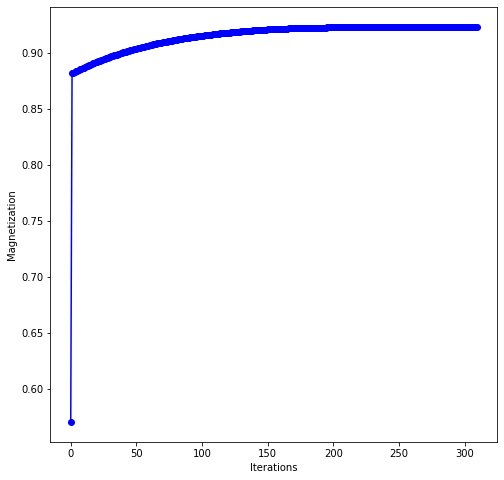

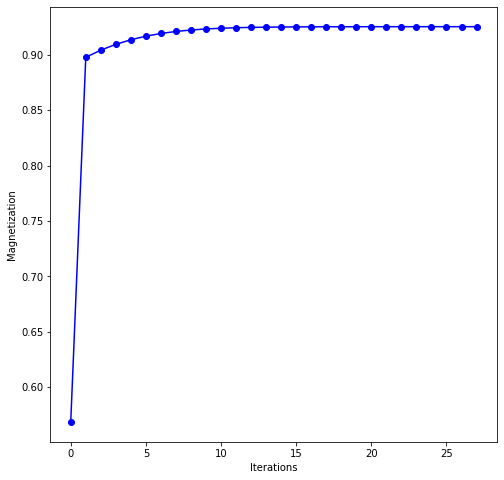

In [6]:
plt.figure(2,figsize=(8,8))
plt.plot(mag_vals_full,'bo')
plt.plot(mag_vals_full,'b')
plt.xlabel("Iterations")
plt.ylabel("Magnetization")


plt.figure(1,figsize=(8,8))
plt.plot(mag_vals_block,'bo')
plt.plot(mag_vals_block,'b')
plt.xlabel("Iterations")
plt.ylabel("Magnetization")

# Visualise on the network

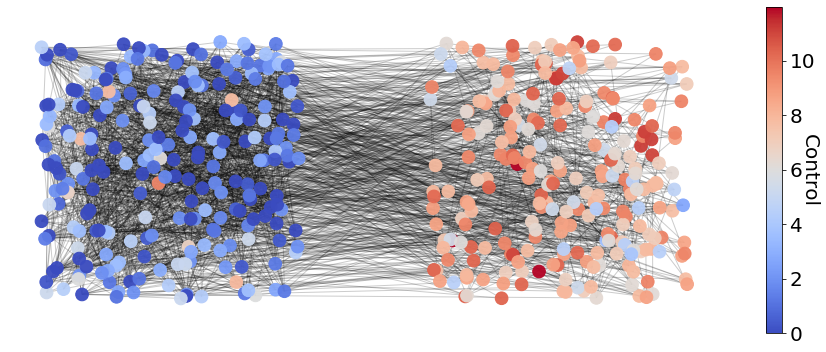

In [7]:
two_block_class.plot_full_control_on_network(sbm_graph,full_control,file_path='full_control_on_graph')

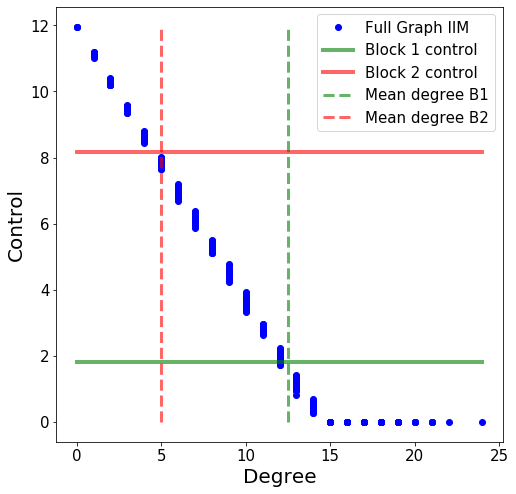

In [8]:
two_block_class.plot_control_vs_degrees(sbm_graph,full_control,block_control,file_path='control_vs_degrees')

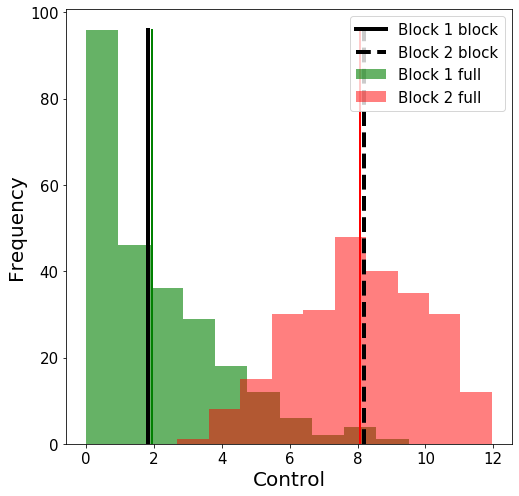

In [9]:
two_block_class.plot_control_histogram(full_control,block_control,file_path='control_hist')